In [1]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\EB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Year/Quarter  Property Type  \
0                 14.0             1              5   
1                 14.0             4              1   
2                 19.0             1              4   
3                 20.0             1              1   
4                 20.0             1              2   
...                ...           ...            ...   
1413             145.0             1              3   
1414             145.0             4              3   
1415             146.0             4              1   
1416             147.0             2              3   
1417             147.0             4              3   

      EnergyUseAveragePerDwelling  CarbonDioxideEmissionsAveragePerDwelling  \
0                           356.0                                       1.0   
1                           468.0                                       1.0   
2                           375.0                                       1.0   
3                      

In [2]:
dataset.dtypes

AverageFloorArea                            float64
Year/Quarter                                  int64
Property Type                                 int64
EnergyUseAveragePerDwelling                 float64
CarbonDioxideEmissionsAveragePerDwelling    float64
LightingCostAveragePerDwelling              float64
HeatingCostAveragePerDwelling               float64
HotWaterCostAveragePerDwelling              float64
dtype: object

In [3]:
del dataset['LightingCostAveragePerDwelling']
del dataset['HotWaterCostAveragePerDwelling']
del dataset['CarbonDioxideEmissionsAveragePerDwelling']

In [4]:
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,HeatingCostAveragePerDwelling
0,14.0,1,5,356.0,236.0
1,14.0,4,1,468.0,187.0
2,19.0,1,4,375.0,253.0
3,20.0,1,1,447.0,147.0
4,20.0,1,2,366.0,131.0
...,...,...,...,...,...
1413,145.0,1,3,241.0,989.0
1414,145.0,4,3,227.0,873.0
1415,146.0,4,1,234.0,967.0
1416,147.0,2,3,233.0,967.0


In [5]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['HeatingCostAveragePerDwelling'] = dataset['HeatingCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,HeatingCostAveragePerDwelling
0,14,1,5,356,236
1,14,4,1,468,187
2,19,1,4,375,253
3,20,1,1,447,147
4,20,1,2,366,131
...,...,...,...,...,...
1413,145,1,3,241,989
1414,145,4,3,227,873
1415,146,4,1,234,967
1416,147,2,3,233,967


In [6]:
from sklearn.model_selection import train_test_split
X=dataset.drop('HeatingCostAveragePerDwelling',axis=1)
Y=dataset['HeatingCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling
565,67,3,1,309
828,83,3,1,302
759,79,3,2,266
1385,134,4,4,271
165,42,4,2,302
...,...,...,...,...
763,79,4,1,315
835,83,4,5,219
1216,113,3,1,260
559,67,1,4,296


## Naive bias

In [19]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [20]:
prediction = NB_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [354]


In [21]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

0.6756506009770737

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 10781.218309859154
mean absolute error: 73.69718309859155


Text(0.5, 1.0, 'Actual vs predicted')

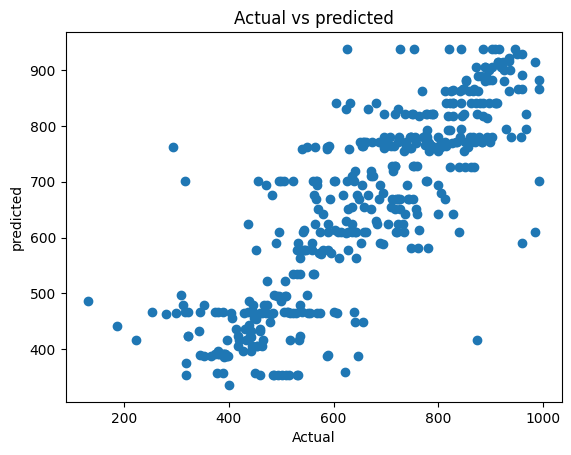

In [23]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [24]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,529,464,65
610,624,609,15
795,635,654,-19
1238,929,795,134
1228,890,905,-15
794,656,764,-108
642,645,676,-31
416,443,396,47
1410,898,900,-2
517,494,354,140


## Linear regression

In [25]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [26]:
prediction = lr_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [450.72300346]


In [27]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.7706859881618524

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 7622.287664426797
mean absolute error: 62.76982780805186


Text(0.5, 1.0, 'Actual vs predicted')

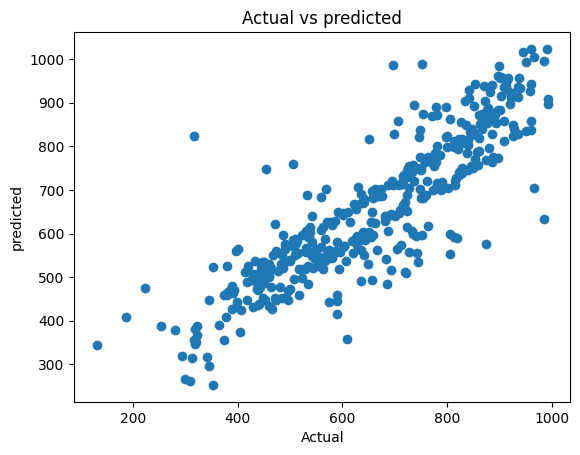

In [29]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [30]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,529,519.285625,9.714375
610,624,588.187654,35.812346
795,635,669.647468,-34.647468
1238,929,838.812051,90.187949
1228,890,866.179849,23.820151
794,656,649.482220,6.517780
642,645,595.378903,49.621097
416,443,506.505091,-63.505091
1410,898,962.448641,-64.448641
517,494,537.592253,-43.592253


## Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,1,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [533.22]


In [49]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.8833692181867986

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 3876.7511953638495
mean absolute error: 35.429683098591546


Text(0.5, 1.0, 'Actual vs predicted')

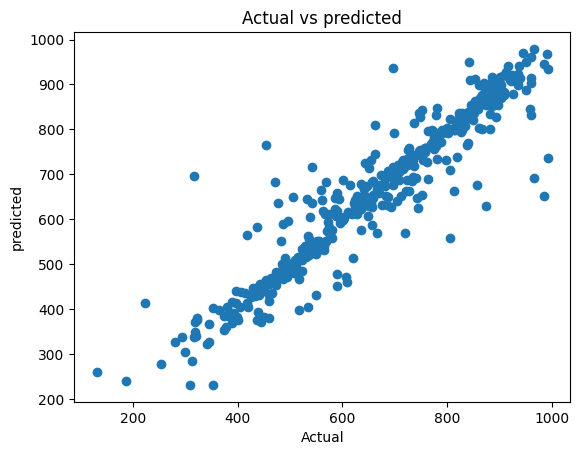

In [51]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [52]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,529,540.790,-11.790
610,624,630.525,-6.525
795,635,635.870,-0.870
1238,929,917.145,11.855
1228,890,886.520,3.480
794,656,626.800,29.200
642,645,637.770,7.230
416,443,456.860,-13.860
1410,898,879.105,18.895
517,494,472.440,21.560


## KNN

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [616.16666667]


In [54]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.7568018670823567

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 8083.789183620239
mean absolute error: 56.72042253521126


Text(0.5, 1.0, 'Actual vs predicted')

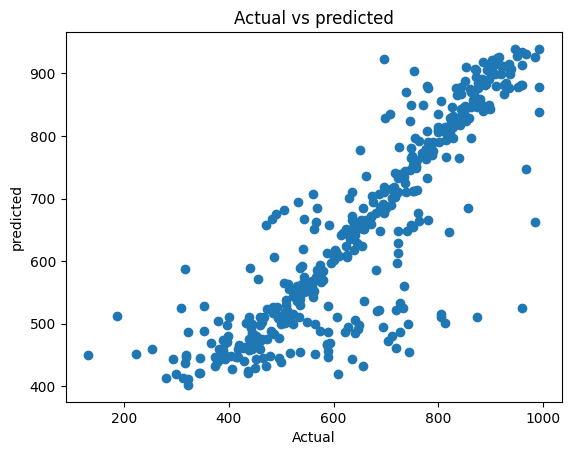

In [56]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [57]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,529,551.766667,-22.766667
610,624,649.266667,-25.266667
795,635,651.966667,-16.966667
1238,929,884.766667,44.233333
1228,890,880.566667,9.433333
794,656,651.633333,4.366667
642,645,629.033333,15.966667
416,443,470.666667,-27.666667
1410,898,913.066667,-15.066667
517,494,509.000000,-15.000000


## CNN

In [14]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             128       
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 16)            0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [15]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 1s 20ms/step - loss: 362737.8125 - mae: 571.2874 - val_loss: 236941.6406 - val_mae: 454.6987
Epoch 2/2000
22/22 [==============================] - 0s 5ms/step - loss: 103431.1562 - mae: 266.5338 - val_loss: 34323.9062 - val_mae: 148.2648
Epoch 3/2000
22/22 [==============================] - 0s 5ms/step - loss: 34058.7969 - mae: 151.3363 - val_loss: 26734.9688 - val_mae: 138.1602
Epoch 4/2000
22/22 [==============================] - 0s 5ms/step - loss: 25996.9922 - mae: 134.0087 - val_loss: 21424.7617 - val_mae: 122.5244
Epoch 5/2000
22/22 [==============================] - 0s 5ms/step - loss: 22214.7227 - mae: 124.7824 - val_loss: 18887.9727 - val_mae: 115.8408
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 18227.6699 - mae: 111.3762 - val_loss: 15554.6514 - val_mae: 105.0791
Epoch 7/2000
22/22 [==============================] - 0s 5ms/step - loss: 15525.9629 - mae: 103.1886 - val_loss: 12519.9268 - val_ma

22/22 [==============================] - 0s 4ms/step - loss: 7529.1685 - mae: 66.8070 - val_loss: 17299.5176 - val_mae: 110.4588
Epoch 116/2000
22/22 [==============================] - 0s 5ms/step - loss: 7188.4756 - mae: 65.9754 - val_loss: 25292.1934 - val_mae: 137.8922
Epoch 117/2000
22/22 [==============================] - 0s 4ms/step - loss: 7328.0527 - mae: 65.7142 - val_loss: 19472.8691 - val_mae: 118.7691
Epoch 118/2000
22/22 [==============================] - 0s 4ms/step - loss: 6873.5078 - mae: 62.9111 - val_loss: 20074.4180 - val_mae: 120.6118
Epoch 119/2000
22/22 [==============================] - 0s 4ms/step - loss: 6939.1558 - mae: 63.1312 - val_loss: 17284.3691 - val_mae: 110.9066
Epoch 120/2000
22/22 [==============================] - 0s 4ms/step - loss: 7509.9604 - mae: 65.8210 - val_loss: 16084.6934 - val_mae: 106.3283
Epoch 121/2000
22/22 [==============================] - 0s 4ms/step - loss: 7510.0015 - mae: 65.7210 - val_loss: 17593.3730 - val_mae: 112.1628
Epoch 1

22/22 [==============================] - 0s 4ms/step - loss: 5757.3193 - mae: 56.8983 - val_loss: 16504.0742 - val_mae: 110.7131
Epoch 173/2000
22/22 [==============================] - 0s 4ms/step - loss: 6033.2368 - mae: 56.6507 - val_loss: 19921.9824 - val_mae: 123.9316
Epoch 174/2000
22/22 [==============================] - 0s 4ms/step - loss: 6023.0747 - mae: 58.6280 - val_loss: 19764.8535 - val_mae: 122.0838
Epoch 175/2000
22/22 [==============================] - 0s 4ms/step - loss: 6492.3882 - mae: 60.4341 - val_loss: 17262.5762 - val_mae: 114.1799
Epoch 176/2000
22/22 [==============================] - 0s 4ms/step - loss: 6626.2671 - mae: 61.6572 - val_loss: 24498.9707 - val_mae: 138.2836
Epoch 177/2000
22/22 [==============================] - 0s 4ms/step - loss: 5693.0825 - mae: 56.4638 - val_loss: 27758.5176 - val_mae: 149.7459
Epoch 178/2000
22/22 [==============================] - 0s 4ms/step - loss: 5647.3418 - mae: 55.3983 - val_loss: 21772.5469 - val_mae: 129.5888
Epoch 1

Epoch 229/2000
22/22 [==============================] - 0s 4ms/step - loss: 5765.6973 - mae: 55.6931 - val_loss: 24381.9609 - val_mae: 139.0605
Epoch 230/2000
22/22 [==============================] - 0s 4ms/step - loss: 5642.6890 - mae: 54.5481 - val_loss: 15479.4912 - val_mae: 107.1244
Epoch 231/2000
22/22 [==============================] - 0s 4ms/step - loss: 6086.0679 - mae: 56.3987 - val_loss: 18517.3262 - val_mae: 118.7001
Epoch 232/2000
22/22 [==============================] - 0s 5ms/step - loss: 5436.2988 - mae: 54.0377 - val_loss: 17835.7754 - val_mae: 117.0379
Epoch 233/2000
22/22 [==============================] - 0s 4ms/step - loss: 5597.5352 - mae: 54.9927 - val_loss: 20431.1348 - val_mae: 126.0450
Epoch 234/2000
22/22 [==============================] - 0s 4ms/step - loss: 5403.1724 - mae: 53.7079 - val_loss: 25165.2715 - val_mae: 142.1869
Epoch 235/2000
22/22 [==============================] - 0s 4ms/step - loss: 5354.5981 - mae: 53.6489 - val_loss: 26410.6738 - val_mae: 1

Epoch 286/2000
22/22 [==============================] - 0s 5ms/step - loss: 5369.4692 - mae: 52.0912 - val_loss: 17470.3750 - val_mae: 116.2766
Epoch 287/2000
22/22 [==============================] - 0s 4ms/step - loss: 5369.7310 - mae: 53.1937 - val_loss: 21762.5430 - val_mae: 131.8883
Epoch 288/2000
22/22 [==============================] - 0s 4ms/step - loss: 5218.2095 - mae: 52.2337 - val_loss: 22746.9453 - val_mae: 134.0719
Epoch 289/2000
22/22 [==============================] - 0s 4ms/step - loss: 5263.1504 - mae: 51.9653 - val_loss: 28046.1094 - val_mae: 151.7094
Epoch 290/2000
22/22 [==============================] - 0s 4ms/step - loss: 5772.8140 - mae: 55.7164 - val_loss: 20439.0918 - val_mae: 126.8031
Epoch 291/2000
22/22 [==============================] - 0s 4ms/step - loss: 5284.2285 - mae: 53.0889 - val_loss: 14976.9277 - val_mae: 106.3960
Epoch 292/2000
22/22 [==============================] - 0s 4ms/step - loss: 5413.1382 - mae: 53.2529 - val_loss: 17548.5820 - val_mae: 1

Epoch 343/2000
22/22 [==============================] - 0s 4ms/step - loss: 5419.5522 - mae: 53.8039 - val_loss: 24588.5020 - val_mae: 140.1732
Epoch 344/2000
22/22 [==============================] - 0s 6ms/step - loss: 5079.0093 - mae: 50.8899 - val_loss: 17947.8086 - val_mae: 117.1153
Epoch 345/2000
22/22 [==============================] - 0s 4ms/step - loss: 5180.2319 - mae: 53.0545 - val_loss: 26026.1855 - val_mae: 144.6249
Epoch 346/2000
22/22 [==============================] - 0s 4ms/step - loss: 5448.8350 - mae: 53.3788 - val_loss: 24341.6406 - val_mae: 140.5625
Epoch 347/2000
22/22 [==============================] - 0s 4ms/step - loss: 5287.8013 - mae: 52.9311 - val_loss: 23006.0469 - val_mae: 134.8745
Epoch 348/2000
22/22 [==============================] - 0s 4ms/step - loss: 5187.0171 - mae: 52.1381 - val_loss: 25298.3203 - val_mae: 142.8456
Epoch 349/2000
22/22 [==============================] - 0s 4ms/step - loss: 5450.8267 - mae: 53.4604 - val_loss: 19341.9355 - val_mae: 1

Epoch 400/2000
22/22 [==============================] - 0s 4ms/step - loss: 5229.7539 - mae: 52.6256 - val_loss: 22448.3516 - val_mae: 132.4389
Epoch 401/2000
22/22 [==============================] - 0s 4ms/step - loss: 5077.5146 - mae: 51.3143 - val_loss: 20642.1680 - val_mae: 128.0151
Epoch 402/2000
22/22 [==============================] - 0s 4ms/step - loss: 5240.1758 - mae: 52.7918 - val_loss: 28477.2246 - val_mae: 152.9970
Epoch 403/2000
22/22 [==============================] - 0s 4ms/step - loss: 5166.7231 - mae: 52.0286 - val_loss: 28964.2285 - val_mae: 155.1121
Epoch 404/2000
22/22 [==============================] - 0s 4ms/step - loss: 5309.2769 - mae: 53.7895 - val_loss: 22647.9453 - val_mae: 133.4229
Epoch 405/2000
22/22 [==============================] - 0s 4ms/step - loss: 5575.2461 - mae: 54.0410 - val_loss: 25372.0273 - val_mae: 143.0553
Epoch 406/2000
22/22 [==============================] - 0s 4ms/step - loss: 5348.9854 - mae: 52.6886 - val_loss: 27264.5703 - val_mae: 1

Epoch 457/2000
22/22 [==============================] - 0s 4ms/step - loss: 4880.4883 - mae: 50.9144 - val_loss: 17682.4355 - val_mae: 116.7441
Epoch 458/2000
22/22 [==============================] - 0s 4ms/step - loss: 5057.3457 - mae: 51.1976 - val_loss: 19889.3750 - val_mae: 125.1686
Epoch 459/2000
22/22 [==============================] - 0s 4ms/step - loss: 4785.4175 - mae: 48.8189 - val_loss: 20678.6797 - val_mae: 128.4729
Epoch 460/2000
22/22 [==============================] - 0s 4ms/step - loss: 5226.1216 - mae: 51.1181 - val_loss: 28551.3184 - val_mae: 154.4424
Epoch 461/2000
22/22 [==============================] - 0s 4ms/step - loss: 5223.0571 - mae: 52.5512 - val_loss: 22022.3340 - val_mae: 132.9199
Epoch 462/2000
22/22 [==============================] - 0s 5ms/step - loss: 5081.0566 - mae: 51.1762 - val_loss: 18041.5059 - val_mae: 119.4361
Epoch 463/2000
22/22 [==============================] - 0s 4ms/step - loss: 5140.9165 - mae: 51.1704 - val_loss: 22402.9629 - val_mae: 1

Epoch 514/2000
22/22 [==============================] - 0s 4ms/step - loss: 4688.7275 - mae: 48.4057 - val_loss: 24096.5566 - val_mae: 140.1190
Epoch 515/2000
22/22 [==============================] - 0s 4ms/step - loss: 4834.3149 - mae: 49.2617 - val_loss: 22934.3047 - val_mae: 136.1899
Epoch 516/2000
22/22 [==============================] - 0s 4ms/step - loss: 5317.9482 - mae: 51.9174 - val_loss: 27474.9219 - val_mae: 151.7780
Epoch 517/2000
22/22 [==============================] - 0s 4ms/step - loss: 4850.0791 - mae: 49.0777 - val_loss: 26472.2324 - val_mae: 146.8063
Epoch 518/2000
22/22 [==============================] - 0s 4ms/step - loss: 4911.4810 - mae: 49.8893 - val_loss: 19600.2676 - val_mae: 123.5698
Epoch 519/2000
22/22 [==============================] - 0s 4ms/step - loss: 4862.1416 - mae: 50.0168 - val_loss: 26511.0352 - val_mae: 147.3620
Epoch 520/2000
22/22 [==============================] - 0s 4ms/step - loss: 4847.5981 - mae: 50.1087 - val_loss: 28219.0273 - val_mae: 1

Epoch 571/2000
22/22 [==============================] - 0s 4ms/step - loss: 4685.4678 - mae: 48.2323 - val_loss: 25605.2090 - val_mae: 145.0407
Epoch 572/2000
22/22 [==============================] - 0s 5ms/step - loss: 4621.8008 - mae: 47.3500 - val_loss: 26658.9531 - val_mae: 148.8670
Epoch 573/2000
22/22 [==============================] - 0s 5ms/step - loss: 4708.1880 - mae: 48.0999 - val_loss: 24293.3711 - val_mae: 140.3903
Epoch 574/2000
22/22 [==============================] - 0s 4ms/step - loss: 4698.5625 - mae: 48.2169 - val_loss: 21797.2012 - val_mae: 132.4370
Epoch 575/2000
22/22 [==============================] - 0s 4ms/step - loss: 4793.3174 - mae: 49.2727 - val_loss: 22912.8145 - val_mae: 136.0123
Epoch 576/2000
22/22 [==============================] - 0s 4ms/step - loss: 4678.1719 - mae: 47.8507 - val_loss: 22544.6953 - val_mae: 135.3044
Epoch 577/2000
22/22 [==============================] - 0s 4ms/step - loss: 4621.1548 - mae: 48.0043 - val_loss: 25944.3496 - val_mae: 1

Epoch 628/2000
22/22 [==============================] - 0s 5ms/step - loss: 4696.7246 - mae: 48.0061 - val_loss: 30785.7207 - val_mae: 161.5555
Epoch 629/2000
22/22 [==============================] - 0s 4ms/step - loss: 4690.8315 - mae: 48.3651 - val_loss: 30724.9590 - val_mae: 161.2163
Epoch 630/2000
22/22 [==============================] - 0s 4ms/step - loss: 4675.0527 - mae: 48.7614 - val_loss: 31996.0098 - val_mae: 165.0513
Epoch 631/2000
22/22 [==============================] - 0s 4ms/step - loss: 4612.4883 - mae: 46.8709 - val_loss: 23876.0645 - val_mae: 139.6414
Epoch 632/2000
22/22 [==============================] - 0s 4ms/step - loss: 4576.7383 - mae: 47.8249 - val_loss: 27117.1543 - val_mae: 150.4829
Epoch 633/2000
22/22 [==============================] - 0s 4ms/step - loss: 4643.3823 - mae: 48.1069 - val_loss: 28903.5781 - val_mae: 155.5527
Epoch 634/2000
22/22 [==============================] - 0s 5ms/step - loss: 4479.3589 - mae: 47.1797 - val_loss: 33970.2617 - val_mae: 1

Epoch 685/2000
22/22 [==============================] - 0s 4ms/step - loss: 4737.9414 - mae: 47.7788 - val_loss: 28844.0332 - val_mae: 156.2386
Epoch 686/2000
22/22 [==============================] - 0s 4ms/step - loss: 4558.7500 - mae: 47.1028 - val_loss: 31908.0000 - val_mae: 164.9396
Epoch 687/2000
22/22 [==============================] - 0s 4ms/step - loss: 4376.7700 - mae: 46.5771 - val_loss: 33119.9219 - val_mae: 169.2831
Epoch 688/2000
22/22 [==============================] - 0s 4ms/step - loss: 4471.3594 - mae: 46.9068 - val_loss: 30630.9941 - val_mae: 160.9714
Epoch 689/2000
22/22 [==============================] - 0s 4ms/step - loss: 4492.8794 - mae: 47.2086 - val_loss: 27900.8125 - val_mae: 152.7475
Epoch 690/2000
22/22 [==============================] - 0s 4ms/step - loss: 4611.4609 - mae: 47.1638 - val_loss: 29270.5039 - val_mae: 156.6517
Epoch 691/2000
22/22 [==============================] - 0s 4ms/step - loss: 4402.8057 - mae: 45.9743 - val_loss: 30706.8691 - val_mae: 1

Epoch 742/2000
22/22 [==============================] - 0s 4ms/step - loss: 4259.0347 - mae: 44.8133 - val_loss: 35148.9570 - val_mae: 174.4631
Epoch 743/2000
22/22 [==============================] - 0s 4ms/step - loss: 4281.7842 - mae: 45.3922 - val_loss: 36692.7344 - val_mae: 178.5949
Epoch 744/2000
22/22 [==============================] - 0s 4ms/step - loss: 4408.9194 - mae: 46.0295 - val_loss: 31734.5137 - val_mae: 164.4733
Epoch 745/2000
22/22 [==============================] - 0s 4ms/step - loss: 4366.8535 - mae: 45.1595 - val_loss: 36041.3203 - val_mae: 176.4393
Epoch 746/2000
22/22 [==============================] - 0s 4ms/step - loss: 4306.8579 - mae: 45.1065 - val_loss: 36150.7500 - val_mae: 177.2109
Epoch 747/2000
22/22 [==============================] - 0s 4ms/step - loss: 4545.5684 - mae: 46.6030 - val_loss: 37258.6328 - val_mae: 180.1069
Epoch 748/2000
22/22 [==============================] - 0s 4ms/step - loss: 4161.0127 - mae: 44.7481 - val_loss: 37845.6328 - val_mae: 1

Epoch 799/2000
22/22 [==============================] - 0s 5ms/step - loss: 4243.6338 - mae: 43.9454 - val_loss: 41505.5000 - val_mae: 191.3247
Epoch 800/2000
22/22 [==============================] - 0s 4ms/step - loss: 4584.8677 - mae: 47.1730 - val_loss: 46403.8164 - val_mae: 203.0946
Epoch 801/2000
22/22 [==============================] - 0s 4ms/step - loss: 4503.5674 - mae: 46.9485 - val_loss: 41331.3398 - val_mae: 190.6751
Epoch 802/2000
22/22 [==============================] - 0s 4ms/step - loss: 4349.2808 - mae: 44.9042 - val_loss: 34457.1562 - val_mae: 172.3715
Epoch 803/2000
22/22 [==============================] - 0s 4ms/step - loss: 4545.3262 - mae: 46.6061 - val_loss: 36082.0977 - val_mae: 177.1519
Epoch 804/2000
22/22 [==============================] - 0s 4ms/step - loss: 4508.9844 - mae: 46.8676 - val_loss: 42249.0117 - val_mae: 193.1581
Epoch 805/2000
22/22 [==============================] - 0s 4ms/step - loss: 4664.8057 - mae: 48.0383 - val_loss: 30353.0898 - val_mae: 1

Epoch 856/2000
22/22 [==============================] - 0s 5ms/step - loss: 4532.7349 - mae: 47.5241 - val_loss: 32613.1172 - val_mae: 166.6880
Epoch 857/2000
22/22 [==============================] - 0s 4ms/step - loss: 4295.3662 - mae: 45.7611 - val_loss: 40110.0156 - val_mae: 187.4184
Epoch 858/2000
22/22 [==============================] - 0s 4ms/step - loss: 4248.6455 - mae: 44.8678 - val_loss: 45302.1328 - val_mae: 201.0387
Epoch 859/2000
22/22 [==============================] - 0s 4ms/step - loss: 4434.9390 - mae: 45.6985 - val_loss: 31886.8359 - val_mae: 165.3781
Epoch 860/2000
22/22 [==============================] - 0s 4ms/step - loss: 4255.2139 - mae: 44.8822 - val_loss: 39416.8672 - val_mae: 185.6415
Epoch 861/2000
22/22 [==============================] - 0s 4ms/step - loss: 4284.0679 - mae: 44.6385 - val_loss: 39078.9922 - val_mae: 185.6477
Epoch 862/2000
22/22 [==============================] - 0s 5ms/step - loss: 4256.7666 - mae: 45.2257 - val_loss: 40315.5469 - val_mae: 1

Epoch 913/2000
22/22 [==============================] - 0s 4ms/step - loss: 4483.7856 - mae: 47.2764 - val_loss: 40079.4453 - val_mae: 187.3641
Epoch 914/2000
22/22 [==============================] - 0s 4ms/step - loss: 4320.9785 - mae: 45.1454 - val_loss: 43081.0508 - val_mae: 195.4680
Epoch 915/2000
22/22 [==============================] - 0s 4ms/step - loss: 4208.5688 - mae: 44.5032 - val_loss: 46262.1992 - val_mae: 202.6522
Epoch 916/2000
22/22 [==============================] - 0s 5ms/step - loss: 4150.5005 - mae: 44.1657 - val_loss: 41403.4883 - val_mae: 191.4762
Epoch 917/2000
22/22 [==============================] - 0s 4ms/step - loss: 4303.5332 - mae: 44.7323 - val_loss: 38012.8945 - val_mae: 182.5677
Epoch 918/2000
22/22 [==============================] - 0s 4ms/step - loss: 4306.8115 - mae: 44.2368 - val_loss: 32583.7285 - val_mae: 167.4535
Epoch 919/2000
22/22 [==============================] - 0s 4ms/step - loss: 4186.8511 - mae: 43.8707 - val_loss: 43552.4375 - val_mae: 1

Epoch 970/2000
22/22 [==============================] - 0s 4ms/step - loss: 4288.3960 - mae: 45.3444 - val_loss: 42606.8125 - val_mae: 194.5802
Epoch 971/2000
22/22 [==============================] - 0s 4ms/step - loss: 4416.3638 - mae: 45.3962 - val_loss: 44786.7930 - val_mae: 199.2096
Epoch 972/2000
22/22 [==============================] - 0s 4ms/step - loss: 4395.8779 - mae: 45.3291 - val_loss: 49007.3438 - val_mae: 209.7267
Epoch 973/2000
22/22 [==============================] - 0s 4ms/step - loss: 4416.6406 - mae: 45.4923 - val_loss: 45159.8008 - val_mae: 200.6758
Epoch 974/2000
22/22 [==============================] - 0s 4ms/step - loss: 4431.2891 - mae: 46.5815 - val_loss: 40302.4766 - val_mae: 187.8145
Epoch 975/2000
22/22 [==============================] - 0s 4ms/step - loss: 4375.2891 - mae: 45.2183 - val_loss: 44170.1797 - val_mae: 197.9924
Epoch 976/2000
22/22 [==============================] - 0s 4ms/step - loss: 4389.9038 - mae: 46.2911 - val_loss: 40591.7969 - val_mae: 1

Epoch 1027/2000
22/22 [==============================] - 0s 4ms/step - loss: 4026.0286 - mae: 42.8997 - val_loss: 36126.4102 - val_mae: 176.8598
Epoch 1028/2000
22/22 [==============================] - 0s 4ms/step - loss: 4270.4326 - mae: 45.3347 - val_loss: 43058.2812 - val_mae: 195.9004
Epoch 1029/2000
22/22 [==============================] - 0s 4ms/step - loss: 4169.0215 - mae: 43.5131 - val_loss: 42507.5156 - val_mae: 193.8521
Epoch 1030/2000
22/22 [==============================] - 0s 4ms/step - loss: 3985.1265 - mae: 42.4461 - val_loss: 41638.7969 - val_mae: 191.7459
Epoch 1031/2000
22/22 [==============================] - 0s 4ms/step - loss: 4176.2822 - mae: 44.0229 - val_loss: 44315.3945 - val_mae: 198.0471
Epoch 1032/2000
22/22 [==============================] - 0s 4ms/step - loss: 4054.3018 - mae: 42.6927 - val_loss: 42626.6797 - val_mae: 194.6433
Epoch 1033/2000
22/22 [==============================] - 0s 4ms/step - loss: 4226.7148 - mae: 43.5416 - val_loss: 48303.7227 - val

22/22 [==============================] - 0s 6ms/step - loss: 4139.7192 - mae: 42.7887 - val_loss: 45548.1172 - val_mae: 201.4636
Epoch 1140/2000
22/22 [==============================] - 0s 5ms/step - loss: 4162.9692 - mae: 43.7960 - val_loss: 44753.6445 - val_mae: 199.3881
Epoch 1141/2000
22/22 [==============================] - 0s 5ms/step - loss: 4090.2703 - mae: 43.2000 - val_loss: 40853.9180 - val_mae: 190.1095
Epoch 1142/2000
22/22 [==============================] - 0s 5ms/step - loss: 4511.3867 - mae: 47.5220 - val_loss: 33841.2852 - val_mae: 170.8897
Epoch 1143/2000
22/22 [==============================] - 0s 5ms/step - loss: 4227.4800 - mae: 44.5019 - val_loss: 52308.8516 - val_mae: 217.0470
Epoch 1144/2000
22/22 [==============================] - 0s 6ms/step - loss: 4175.6611 - mae: 43.5743 - val_loss: 37976.1055 - val_mae: 182.4112
Epoch 1145/2000
22/22 [==============================] - 0s 5ms/step - loss: 4095.1357 - mae: 43.4192 - val_loss: 34102.5820 - val_mae: 172.2090
E

22/22 [==============================] - 0s 4ms/step - loss: 4026.1970 - mae: 42.6278 - val_loss: 47728.4023 - val_mae: 206.6579
Epoch 1252/2000
22/22 [==============================] - 0s 4ms/step - loss: 4036.4275 - mae: 42.5191 - val_loss: 48110.7734 - val_mae: 207.6161
Epoch 1253/2000
22/22 [==============================] - 0s 5ms/step - loss: 3964.5161 - mae: 41.7665 - val_loss: 43529.3281 - val_mae: 196.0796
Epoch 1254/2000
22/22 [==============================] - 0s 4ms/step - loss: 4074.2341 - mae: 43.0336 - val_loss: 36070.5977 - val_mae: 177.6548
Epoch 1255/2000
22/22 [==============================] - 0s 4ms/step - loss: 4344.2788 - mae: 45.4899 - val_loss: 34950.5078 - val_mae: 173.6928
Epoch 1256/2000
22/22 [==============================] - 0s 4ms/step - loss: 4057.9492 - mae: 43.2717 - val_loss: 41288.0000 - val_mae: 190.9496
Epoch 1257/2000
22/22 [==============================] - 0s 5ms/step - loss: 4179.8853 - mae: 43.8370 - val_loss: 46527.0820 - val_mae: 203.7870
E

22/22 [==============================] - 0s 5ms/step - loss: 3951.2878 - mae: 42.0172 - val_loss: 50806.3281 - val_mae: 213.5072
Epoch 1364/2000
22/22 [==============================] - 0s 4ms/step - loss: 4089.0957 - mae: 43.3575 - val_loss: 43821.9570 - val_mae: 197.0951
Epoch 1365/2000
22/22 [==============================] - 0s 5ms/step - loss: 3997.7373 - mae: 42.2361 - val_loss: 45055.5273 - val_mae: 200.1621
Epoch 1366/2000
22/22 [==============================] - 0s 5ms/step - loss: 4109.2231 - mae: 42.5758 - val_loss: 46681.0820 - val_mae: 204.0834
Epoch 1367/2000
22/22 [==============================] - 0s 5ms/step - loss: 4253.4199 - mae: 43.1051 - val_loss: 54715.8750 - val_mae: 222.2143
Epoch 1368/2000
22/22 [==============================] - 0s 5ms/step - loss: 4186.2246 - mae: 44.6659 - val_loss: 40544.7109 - val_mae: 188.1277
Epoch 1369/2000
22/22 [==============================] - 0s 4ms/step - loss: 4027.0623 - mae: 42.9952 - val_loss: 43583.9883 - val_mae: 196.9434
E

22/22 [==============================] - 0s 4ms/step - loss: 4084.7742 - mae: 42.2314 - val_loss: 47609.2578 - val_mae: 206.1605
Epoch 1476/2000
22/22 [==============================] - 0s 4ms/step - loss: 4088.8196 - mae: 42.4522 - val_loss: 50210.5234 - val_mae: 211.9633
Epoch 1477/2000
22/22 [==============================] - 0s 4ms/step - loss: 4010.0674 - mae: 42.0176 - val_loss: 47346.0195 - val_mae: 205.8254
Epoch 1478/2000
22/22 [==============================] - 0s 4ms/step - loss: 4189.5430 - mae: 43.9111 - val_loss: 49754.2305 - val_mae: 210.9577
Epoch 1479/2000
22/22 [==============================] - 0s 4ms/step - loss: 4051.4241 - mae: 42.8600 - val_loss: 47100.8984 - val_mae: 204.9338
Epoch 1480/2000
22/22 [==============================] - 0s 4ms/step - loss: 4311.5845 - mae: 45.6419 - val_loss: 49083.2852 - val_mae: 209.2582
Epoch 1481/2000
22/22 [==============================] - 0s 4ms/step - loss: 4079.2278 - mae: 43.1472 - val_loss: 39710.4688 - val_mae: 186.7221
E

22/22 [==============================] - 0s 4ms/step - loss: 3914.0889 - mae: 42.2573 - val_loss: 45345.9492 - val_mae: 200.5986
Epoch 1588/2000
22/22 [==============================] - 0s 4ms/step - loss: 4050.5969 - mae: 42.6262 - val_loss: 42179.9648 - val_mae: 192.9467
Epoch 1589/2000
22/22 [==============================] - 0s 4ms/step - loss: 3961.7910 - mae: 42.1423 - val_loss: 51747.6680 - val_mae: 215.9082
Epoch 1590/2000
22/22 [==============================] - 0s 4ms/step - loss: 3970.0732 - mae: 41.5629 - val_loss: 53998.3203 - val_mae: 220.3525
Epoch 1591/2000
22/22 [==============================] - 0s 4ms/step - loss: 4213.0479 - mae: 43.4766 - val_loss: 43814.0703 - val_mae: 197.1326
Epoch 1592/2000
22/22 [==============================] - 0s 4ms/step - loss: 4319.8296 - mae: 45.0976 - val_loss: 46138.4414 - val_mae: 202.3679
Epoch 1593/2000
22/22 [==============================] - 0s 4ms/step - loss: 4158.8569 - mae: 44.5234 - val_loss: 42886.2188 - val_mae: 195.0701
E

22/22 [==============================] - 0s 4ms/step - loss: 4028.6045 - mae: 43.4655 - val_loss: 43345.0664 - val_mae: 195.9658
Epoch 1700/2000
22/22 [==============================] - 0s 4ms/step - loss: 4054.5952 - mae: 42.3989 - val_loss: 46093.3281 - val_mae: 202.2695
Epoch 1701/2000
22/22 [==============================] - 0s 4ms/step - loss: 4200.1836 - mae: 43.3092 - val_loss: 52268.8867 - val_mae: 216.2534
Epoch 1702/2000
22/22 [==============================] - 0s 4ms/step - loss: 4047.0068 - mae: 43.0478 - val_loss: 42685.6875 - val_mae: 194.3639
Epoch 1703/2000
22/22 [==============================] - 0s 4ms/step - loss: 4053.7446 - mae: 42.5359 - val_loss: 48767.8047 - val_mae: 209.2169
Epoch 1704/2000
22/22 [==============================] - 0s 4ms/step - loss: 3921.5029 - mae: 41.1593 - val_loss: 49885.9609 - val_mae: 211.7046
Epoch 1705/2000
22/22 [==============================] - 0s 4ms/step - loss: 3985.3726 - mae: 42.5813 - val_loss: 35994.6328 - val_mae: 176.8256
E

22/22 [==============================] - 0s 4ms/step - loss: 3989.6672 - mae: 42.2668 - val_loss: 46234.2070 - val_mae: 203.1935
Epoch 1812/2000
22/22 [==============================] - 0s 4ms/step - loss: 4137.8315 - mae: 43.2861 - val_loss: 44695.2500 - val_mae: 199.0407
Epoch 1813/2000
22/22 [==============================] - 0s 4ms/step - loss: 3979.4478 - mae: 42.6724 - val_loss: 44666.0742 - val_mae: 198.9470
Epoch 1814/2000
22/22 [==============================] - 0s 4ms/step - loss: 4028.4275 - mae: 42.1209 - val_loss: 47742.8828 - val_mae: 206.2148
Epoch 1815/2000
22/22 [==============================] - 0s 4ms/step - loss: 4031.7214 - mae: 43.0146 - val_loss: 38167.0898 - val_mae: 182.6584
Epoch 1816/2000
22/22 [==============================] - 0s 4ms/step - loss: 4088.4399 - mae: 43.3487 - val_loss: 41180.1016 - val_mae: 190.5132
Epoch 1817/2000
22/22 [==============================] - 0s 4ms/step - loss: 3991.9976 - mae: 41.7643 - val_loss: 51816.6836 - val_mae: 215.7808
E

22/22 [==============================] - 0s 4ms/step - loss: 4068.6228 - mae: 42.6439 - val_loss: 49299.4180 - val_mae: 209.7791
Epoch 1924/2000
22/22 [==============================] - 0s 4ms/step - loss: 4137.1431 - mae: 43.1104 - val_loss: 46726.9453 - val_mae: 203.4569
Epoch 1925/2000
22/22 [==============================] - 0s 4ms/step - loss: 4239.0156 - mae: 44.2935 - val_loss: 36411.6055 - val_mae: 177.8496
Epoch 1926/2000
22/22 [==============================] - 0s 4ms/step - loss: 4084.6096 - mae: 43.0450 - val_loss: 50761.7500 - val_mae: 212.8227
Epoch 1927/2000
22/22 [==============================] - 0s 4ms/step - loss: 4077.4568 - mae: 42.8293 - val_loss: 42922.5312 - val_mae: 194.9303
Epoch 1928/2000
22/22 [==============================] - 0s 4ms/step - loss: 4327.9980 - mae: 45.7652 - val_loss: 45766.5312 - val_mae: 201.1655
Epoch 1929/2000
22/22 [==============================] - 0s 4ms/step - loss: 4389.6519 - mae: 45.0068 - val_loss: 43070.6172 - val_mae: 194.8729
E

In [16]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

14/14 [==============================] - 0s 2ms/step


-0.5477618912706579

In [17]:
prediction =np.squeeze(model1.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 115ms/step
Prediction: 275.4315185546875


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 1ms/step
mean squired error: 51446.86221629153
mean absolute error: 214.19191616577723


14/14 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Actual vs predicted')

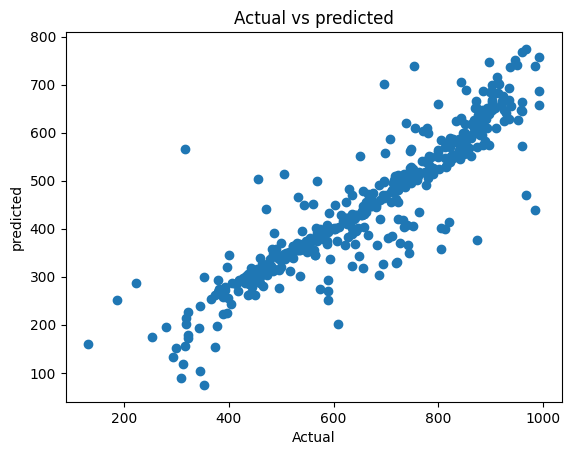

In [19]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [20]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 1ms/step


,Actual,predict,differences
431,529,363.197693,165.802307
610,624,421.917694,202.082306
795,635,430.322632,204.677368
1238,929,640.787842,288.212158
1228,890,631.381348,258.618652
794,656,447.390808,208.609192
642,645,428.411804,216.588196
416,443,309.710175,133.289825
1410,898,746.557312,151.442688
517,494,339.789856,154.210144


## NN with dense layer

In [65]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=4, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [66]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 3s 45ms/step - loss: 293077.7500 - mae: 504.9680 - val_loss: 170548.1719 - val_mae: 368.5706
Epoch 2/2000
22/22 [==============================] - 0s 21ms/step - loss: 89005.3984 - mae: 248.8035 - val_loss: 36596.0352 - val_mae: 160.4595
Epoch 3/2000
22/22 [==============================] - 0s 13ms/step - loss: 37006.0273 - mae: 158.1258 - val_loss: 33433.1289 - val_mae: 150.5775
Epoch 4/2000
22/22 [==============================] - 0s 13ms/step - loss: 30919.1074 - mae: 147.6645 - val_loss: 27850.8926 - val_mae: 139.5064
Epoch 5/2000
22/22 [==============================] - 0s 13ms/step - loss: 26201.4668 - mae: 136.3752 - val_loss: 23038.3105 - val_mae: 125.9902
Epoch 6/2000
22/22 [==============================] - 0s 15ms/step - loss: 21319.5195 - mae: 123.3561 - val_loss: 18777.3027 - val_mae: 112.5854
Epoch 7/2000
22/22 [==============================] - 0s 13ms/step - loss: 16925.8457 - mae: 108.1266 - val_loss: 14689.2031 - v

Epoch 116/2000
22/22 [==============================] - 0s 9ms/step - loss: 6479.1196 - mae: 59.6837 - val_loss: 7177.5225 - val_mae: 63.6301
Epoch 117/2000
22/22 [==============================] - 0s 12ms/step - loss: 6499.2910 - mae: 59.6450 - val_loss: 6964.5225 - val_mae: 62.8647
Epoch 118/2000
22/22 [==============================] - 0s 14ms/step - loss: 6567.8198 - mae: 60.3370 - val_loss: 6933.4961 - val_mae: 62.1403
Epoch 119/2000
22/22 [==============================] - 0s 11ms/step - loss: 6452.0757 - mae: 59.2562 - val_loss: 6921.2021 - val_mae: 62.3865
Epoch 120/2000
22/22 [==============================] - 0s 14ms/step - loss: 6492.4043 - mae: 59.4940 - val_loss: 6896.6538 - val_mae: 61.8966
Epoch 121/2000
22/22 [==============================] - 0s 9ms/step - loss: 6446.7817 - mae: 59.7205 - val_loss: 7125.7876 - val_mae: 63.3052
Epoch 122/2000
22/22 [==============================] - 0s 15ms/step - loss: 6608.7715 - mae: 60.6905 - val_loss: 6876.6152 - val_mae: 61.8921
E

22/22 [==============================] - 0s 13ms/step - loss: 5895.3882 - mae: 55.9143 - val_loss: 6089.0200 - val_mae: 54.5299
Epoch 231/2000
22/22 [==============================] - 0s 9ms/step - loss: 5879.8774 - mae: 56.0932 - val_loss: 6065.3770 - val_mae: 54.5745
Epoch 232/2000
22/22 [==============================] - 0s 13ms/step - loss: 5727.4912 - mae: 53.6507 - val_loss: 6019.9707 - val_mae: 54.9075
Epoch 233/2000
22/22 [==============================] - 0s 11ms/step - loss: 5908.5073 - mae: 56.5172 - val_loss: 6055.3687 - val_mae: 54.6053
Epoch 234/2000
22/22 [==============================] - 0s 9ms/step - loss: 5500.3545 - mae: 52.4033 - val_loss: 6107.3525 - val_mae: 54.3184
Epoch 235/2000
22/22 [==============================] - 0s 10ms/step - loss: 5553.2305 - mae: 52.6584 - val_loss: 6065.3081 - val_mae: 54.1975
Epoch 236/2000
22/22 [==============================] - 0s 8ms/step - loss: 5516.4312 - mae: 51.9013 - val_loss: 6021.6772 - val_mae: 54.3648
Epoch 237/2000
22

22/22 [==============================] - 0s 14ms/step - loss: 4657.6313 - mae: 46.4090 - val_loss: 5628.1489 - val_mae: 51.1903
Epoch 345/2000
22/22 [==============================] - 0s 10ms/step - loss: 4685.1260 - mae: 47.3909 - val_loss: 5157.2393 - val_mae: 47.5580
Epoch 346/2000
22/22 [==============================] - 0s 13ms/step - loss: 4596.5762 - mae: 45.8997 - val_loss: 5213.3164 - val_mae: 47.0882
Epoch 347/2000
22/22 [==============================] - 0s 9ms/step - loss: 4646.6206 - mae: 45.9785 - val_loss: 5156.0303 - val_mae: 47.3213
Epoch 348/2000
22/22 [==============================] - 0s 10ms/step - loss: 4904.4658 - mae: 49.2927 - val_loss: 5213.6636 - val_mae: 47.0021
Epoch 349/2000
22/22 [==============================] - 0s 15ms/step - loss: 4710.7144 - mae: 46.8578 - val_loss: 5306.2944 - val_mae: 48.2445
Epoch 350/2000
22/22 [==============================] - 0s 12ms/step - loss: 4574.8037 - mae: 45.9501 - val_loss: 5418.8037 - val_mae: 50.8826
Epoch 351/2000


22/22 [==============================] - 0s 10ms/step - loss: 4274.9971 - mae: 43.4375 - val_loss: 5262.1172 - val_mae: 49.2038
Epoch 459/2000
22/22 [==============================] - 0s 13ms/step - loss: 4263.6294 - mae: 43.2267 - val_loss: 4799.5767 - val_mae: 44.6490
Epoch 460/2000
22/22 [==============================] - 0s 10ms/step - loss: 4329.4961 - mae: 42.5500 - val_loss: 4791.7744 - val_mae: 43.8591
Epoch 461/2000
22/22 [==============================] - 0s 14ms/step - loss: 4281.1567 - mae: 43.4646 - val_loss: 4857.7466 - val_mae: 43.8827
Epoch 462/2000
22/22 [==============================] - 0s 12ms/step - loss: 4232.0981 - mae: 42.7532 - val_loss: 4839.7158 - val_mae: 43.6732
Epoch 463/2000
22/22 [==============================] - 0s 13ms/step - loss: 4204.3345 - mae: 41.5626 - val_loss: 4870.2417 - val_mae: 45.9561
Epoch 464/2000
22/22 [==============================] - 0s 11ms/step - loss: 4220.4312 - mae: 42.4336 - val_loss: 4812.7866 - val_mae: 43.4936
Epoch 465/2000

22/22 [==============================] - 0s 18ms/step - loss: 4163.5088 - mae: 41.8801 - val_loss: 5458.9619 - val_mae: 51.1554
Epoch 573/2000
22/22 [==============================] - 0s 9ms/step - loss: 4104.8149 - mae: 40.7307 - val_loss: 4659.9937 - val_mae: 41.4342
Epoch 574/2000
22/22 [==============================] - 0s 12ms/step - loss: 3964.9766 - mae: 39.8979 - val_loss: 4627.0283 - val_mae: 41.7010
Epoch 575/2000
22/22 [==============================] - 0s 11ms/step - loss: 4184.3110 - mae: 43.0957 - val_loss: 4745.9326 - val_mae: 44.5576
Epoch 576/2000
22/22 [==============================] - 0s 9ms/step - loss: 4083.8313 - mae: 42.3890 - val_loss: 4971.6851 - val_mae: 46.6014
Epoch 577/2000
22/22 [==============================] - 0s 13ms/step - loss: 4347.9961 - mae: 44.5246 - val_loss: 4798.8916 - val_mae: 44.7276
Epoch 578/2000
22/22 [==============================] - 0s 15ms/step - loss: 4043.9749 - mae: 40.8823 - val_loss: 4779.5342 - val_mae: 41.7967
Epoch 579/2000
2

22/22 [==============================] - 0s 14ms/step - loss: 3871.1379 - mae: 39.1718 - val_loss: 4536.5908 - val_mae: 40.6583
Epoch 687/2000
22/22 [==============================] - 0s 9ms/step - loss: 3873.8379 - mae: 38.7946 - val_loss: 4724.1548 - val_mae: 43.2177
Epoch 688/2000
22/22 [==============================] - 0s 14ms/step - loss: 3810.9204 - mae: 38.7597 - val_loss: 4637.2871 - val_mae: 42.2031
Epoch 689/2000
22/22 [==============================] - 0s 11ms/step - loss: 4097.7607 - mae: 41.0658 - val_loss: 4916.8984 - val_mae: 45.7924
Epoch 690/2000
22/22 [==============================] - 0s 13ms/step - loss: 4098.9902 - mae: 41.1776 - val_loss: 4529.4595 - val_mae: 40.8701
Epoch 691/2000
22/22 [==============================] - 0s 9ms/step - loss: 3798.7529 - mae: 38.4950 - val_loss: 4573.7549 - val_mae: 40.5318
Epoch 692/2000
22/22 [==============================] - 0s 11ms/step - loss: 3831.4690 - mae: 38.6975 - val_loss: 4521.1421 - val_mae: 40.9351
Epoch 693/2000
2

22/22 [==============================] - 0s 12ms/step - loss: 3708.4363 - mae: 37.2206 - val_loss: 4506.1436 - val_mae: 40.2714
Epoch 801/2000
22/22 [==============================] - 0s 8ms/step - loss: 3776.9819 - mae: 38.4172 - val_loss: 4629.3350 - val_mae: 42.4952
Epoch 802/2000
22/22 [==============================] - 0s 9ms/step - loss: 3713.0669 - mae: 37.7812 - val_loss: 4520.3818 - val_mae: 40.4172
Epoch 803/2000
22/22 [==============================] - 0s 8ms/step - loss: 3690.2063 - mae: 36.9487 - val_loss: 4511.3408 - val_mae: 41.2452
Epoch 804/2000
22/22 [==============================] - 0s 7ms/step - loss: 3853.6545 - mae: 39.9262 - val_loss: 4877.4111 - val_mae: 46.4061
Epoch 805/2000
22/22 [==============================] - 0s 12ms/step - loss: 4025.6606 - mae: 41.8803 - val_loss: 4710.1514 - val_mae: 40.4358
Epoch 806/2000
22/22 [==============================] - 0s 8ms/step - loss: 4005.5947 - mae: 40.1919 - val_loss: 4437.5381 - val_mae: 39.1264
Epoch 807/2000
22/2

22/22 [==============================] - 0s 21ms/step - loss: 3763.3198 - mae: 39.9502 - val_loss: 4463.2554 - val_mae: 39.3359
Epoch 915/2000
22/22 [==============================] - 0s 17ms/step - loss: 3688.7090 - mae: 38.4878 - val_loss: 4461.8125 - val_mae: 39.7789
Epoch 916/2000
22/22 [==============================] - 0s 16ms/step - loss: 3695.8562 - mae: 38.3254 - val_loss: 4335.2583 - val_mae: 39.1007
Epoch 917/2000
22/22 [==============================] - 0s 17ms/step - loss: 3620.7690 - mae: 38.6425 - val_loss: 4770.6353 - val_mae: 44.9285
Epoch 918/2000
22/22 [==============================] - 0s 9ms/step - loss: 3805.5759 - mae: 39.2016 - val_loss: 4368.5952 - val_mae: 38.8383
Epoch 919/2000
22/22 [==============================] - 0s 20ms/step - loss: 3706.7710 - mae: 39.7892 - val_loss: 4659.8491 - val_mae: 43.3397
Epoch 920/2000
22/22 [==============================] - 0s 12ms/step - loss: 3933.9265 - mae: 41.3288 - val_loss: 4625.6001 - val_mae: 42.5829
Epoch 921/2000


22/22 [==============================] - 0s 15ms/step - loss: 3696.3113 - mae: 39.4013 - val_loss: 4475.4136 - val_mae: 40.9750
Epoch 1029/2000
22/22 [==============================] - 0s 15ms/step - loss: 3584.7798 - mae: 36.5771 - val_loss: 4478.5640 - val_mae: 41.4002
Epoch 1030/2000
22/22 [==============================] - 0s 17ms/step - loss: 3717.0588 - mae: 39.1801 - val_loss: 4433.4688 - val_mae: 39.5995
Epoch 1031/2000
22/22 [==============================] - 0s 16ms/step - loss: 3511.0293 - mae: 36.4478 - val_loss: 4339.7383 - val_mae: 39.0934
Epoch 1032/2000
22/22 [==============================] - 0s 11ms/step - loss: 3602.0703 - mae: 38.4338 - val_loss: 4748.9658 - val_mae: 45.6837
Epoch 1033/2000
22/22 [==============================] - 0s 18ms/step - loss: 3648.6968 - mae: 38.9809 - val_loss: 4370.3618 - val_mae: 41.2796
Epoch 1034/2000
22/22 [==============================] - 1s 25ms/step - loss: 3618.8613 - mae: 37.9340 - val_loss: 4986.3872 - val_mae: 46.2297
Epoch 10

22/22 [==============================] - 0s 18ms/step - loss: 3549.5046 - mae: 37.7002 - val_loss: 4330.8164 - val_mae: 39.4435
Epoch 1086/2000
22/22 [==============================] - 0s 15ms/step - loss: 3654.0508 - mae: 38.9999 - val_loss: 4589.7075 - val_mae: 43.3096
Epoch 1087/2000
22/22 [==============================] - 0s 17ms/step - loss: 4317.1494 - mae: 46.4891 - val_loss: 5691.6724 - val_mae: 56.3041
Epoch 1088/2000
22/22 [==============================] - 0s 15ms/step - loss: 3614.2119 - mae: 37.6776 - val_loss: 4540.1792 - val_mae: 42.1424
Epoch 1089/2000
22/22 [==============================] - 0s 17ms/step - loss: 3581.9211 - mae: 37.7880 - val_loss: 4475.4526 - val_mae: 41.4267
Epoch 1090/2000
22/22 [==============================] - 1s 25ms/step - loss: 3605.9998 - mae: 38.6071 - val_loss: 4932.6421 - val_mae: 46.8059
Epoch 1091/2000
22/22 [==============================] - 0s 15ms/step - loss: 3610.4106 - mae: 38.1499 - val_loss: 4320.1235 - val_mae: 39.1493
Epoch 10

22/22 [==============================] - 1s 25ms/step - loss: 3672.7358 - mae: 39.2283 - val_loss: 4845.3145 - val_mae: 46.0265
Epoch 1143/2000
22/22 [==============================] - 0s 17ms/step - loss: 3732.0325 - mae: 40.5717 - val_loss: 4553.4570 - val_mae: 41.4116
Epoch 1144/2000
22/22 [==============================] - 0s 19ms/step - loss: 3434.9917 - mae: 37.0325 - val_loss: 4401.1494 - val_mae: 41.2387
Epoch 1145/2000
22/22 [==============================] - 0s 23ms/step - loss: 3600.4878 - mae: 39.2858 - val_loss: 4415.9238 - val_mae: 40.6011
Epoch 1146/2000
22/22 [==============================] - 0s 11ms/step - loss: 3423.4941 - mae: 35.9308 - val_loss: 4368.1577 - val_mae: 40.6591
Epoch 1147/2000
22/22 [==============================] - 0s 18ms/step - loss: 3590.4736 - mae: 37.7091 - val_loss: 4437.7827 - val_mae: 40.8104
Epoch 1148/2000
22/22 [==============================] - 0s 16ms/step - loss: 3652.8250 - mae: 38.9360 - val_loss: 4933.4023 - val_mae: 46.9255
Epoch 11

22/22 [==============================] - 0s 13ms/step - loss: 3442.2878 - mae: 35.7991 - val_loss: 4275.5239 - val_mae: 39.3983
Epoch 1200/2000
22/22 [==============================] - 0s 19ms/step - loss: 3385.4233 - mae: 36.5015 - val_loss: 4550.0020 - val_mae: 41.2119
Epoch 1201/2000
22/22 [==============================] - 0s 20ms/step - loss: 3842.1714 - mae: 41.9123 - val_loss: 5058.4175 - val_mae: 48.4118
Epoch 1202/2000
22/22 [==============================] - 0s 12ms/step - loss: 3528.5154 - mae: 37.7436 - val_loss: 4332.5659 - val_mae: 38.4937
Epoch 1203/2000
22/22 [==============================] - 0s 23ms/step - loss: 3397.2600 - mae: 36.0718 - val_loss: 4395.4360 - val_mae: 39.7287
Epoch 1204/2000
22/22 [==============================] - 0s 14ms/step - loss: 3470.1831 - mae: 36.9499 - val_loss: 4292.5166 - val_mae: 38.4668
Epoch 1205/2000
22/22 [==============================] - 0s 16ms/step - loss: 3391.0007 - mae: 35.1503 - val_loss: 4446.1709 - val_mae: 41.1482
Epoch 12

22/22 [==============================] - 0s 21ms/step - loss: 3409.0645 - mae: 37.1013 - val_loss: 4418.4126 - val_mae: 41.0200
Epoch 1257/2000
22/22 [==============================] - 0s 13ms/step - loss: 3632.9773 - mae: 39.5530 - val_loss: 4373.2832 - val_mae: 39.8498
Epoch 1258/2000
22/22 [==============================] - 0s 23ms/step - loss: 3746.6780 - mae: 41.1482 - val_loss: 4291.3682 - val_mae: 38.3539
Epoch 1259/2000
22/22 [==============================] - 0s 22ms/step - loss: 3483.0129 - mae: 36.9801 - val_loss: 4312.4746 - val_mae: 39.7045
Epoch 1260/2000
22/22 [==============================] - 0s 16ms/step - loss: 3340.8401 - mae: 35.3275 - val_loss: 4301.0659 - val_mae: 38.9010
Epoch 1261/2000
22/22 [==============================] - 0s 20ms/step - loss: 3428.0144 - mae: 36.8650 - val_loss: 4596.9624 - val_mae: 41.0381
Epoch 1262/2000
22/22 [==============================] - 0s 12ms/step - loss: 3402.5227 - mae: 36.5146 - val_loss: 4415.0503 - val_mae: 40.2543
Epoch 12

22/22 [==============================] - 0s 17ms/step - loss: 3349.3635 - mae: 36.4031 - val_loss: 4758.2974 - val_mae: 46.6552
Epoch 1314/2000
22/22 [==============================] - 0s 16ms/step - loss: 3376.5583 - mae: 36.3064 - val_loss: 4437.7324 - val_mae: 40.0514
Epoch 1315/2000
22/22 [==============================] - 0s 18ms/step - loss: 3279.4790 - mae: 34.7308 - val_loss: 4297.4272 - val_mae: 38.9999
Epoch 1316/2000
22/22 [==============================] - 0s 15ms/step - loss: 3317.5659 - mae: 35.5624 - val_loss: 4293.2920 - val_mae: 38.3844
Epoch 1317/2000
22/22 [==============================] - 1s 24ms/step - loss: 3383.3857 - mae: 36.3398 - val_loss: 4386.3140 - val_mae: 39.5125
Epoch 1318/2000
22/22 [==============================] - 0s 18ms/step - loss: 3401.6448 - mae: 37.1970 - val_loss: 4586.0776 - val_mae: 44.0196
Epoch 1319/2000
22/22 [==============================] - 0s 13ms/step - loss: 3524.8567 - mae: 39.6284 - val_loss: 4955.3320 - val_mae: 49.1281
Epoch 13

22/22 [==============================] - 0s 15ms/step - loss: 3393.9863 - mae: 36.5658 - val_loss: 4630.6182 - val_mae: 45.3615
Epoch 1371/2000
22/22 [==============================] - 0s 18ms/step - loss: 3618.8137 - mae: 39.5722 - val_loss: 4275.4854 - val_mae: 39.0052
Epoch 1372/2000
22/22 [==============================] - 0s 23ms/step - loss: 3342.0493 - mae: 37.2339 - val_loss: 4418.0498 - val_mae: 39.8035
Epoch 1373/2000
22/22 [==============================] - 0s 11ms/step - loss: 3367.9727 - mae: 35.7301 - val_loss: 4468.6724 - val_mae: 43.3101
Epoch 1374/2000
22/22 [==============================] - 0s 20ms/step - loss: 3706.9417 - mae: 40.0556 - val_loss: 4248.5361 - val_mae: 38.6321
Epoch 1375/2000
22/22 [==============================] - 0s 18ms/step - loss: 3487.9778 - mae: 36.9490 - val_loss: 4330.9028 - val_mae: 41.5288
Epoch 1376/2000
22/22 [==============================] - 0s 18ms/step - loss: 3418.5803 - mae: 36.7054 - val_loss: 4412.2397 - val_mae: 40.4071
Epoch 13

22/22 [==============================] - 0s 20ms/step - loss: 3500.1902 - mae: 38.2308 - val_loss: 4303.4717 - val_mae: 39.7537
Epoch 1428/2000
22/22 [==============================] - 0s 14ms/step - loss: 3282.1340 - mae: 35.6639 - val_loss: 4449.2188 - val_mae: 38.1044
Epoch 1429/2000
22/22 [==============================] - 0s 19ms/step - loss: 3244.8430 - mae: 34.4617 - val_loss: 4284.2285 - val_mae: 38.9378
Epoch 1430/2000
22/22 [==============================] - 0s 21ms/step - loss: 3273.0508 - mae: 36.1457 - val_loss: 4953.7705 - val_mae: 48.9311
Epoch 1431/2000
22/22 [==============================] - 0s 16ms/step - loss: 3611.1184 - mae: 38.8520 - val_loss: 4432.1064 - val_mae: 40.0654
Epoch 1432/2000
22/22 [==============================] - 0s 16ms/step - loss: 3500.9778 - mae: 38.8966 - val_loss: 4508.2358 - val_mae: 40.9078
Epoch 1433/2000
22/22 [==============================] - 0s 14ms/step - loss: 3366.6885 - mae: 36.0131 - val_loss: 4474.0752 - val_mae: 38.0441
Epoch 14

22/22 [==============================] - 0s 16ms/step - loss: 3413.6917 - mae: 37.8400 - val_loss: 4250.3003 - val_mae: 38.5806
Epoch 1485/2000
22/22 [==============================] - 0s 9ms/step - loss: 3343.6052 - mae: 36.6316 - val_loss: 4360.1899 - val_mae: 39.7079
Epoch 1486/2000
22/22 [==============================] - 0s 14ms/step - loss: 3261.2119 - mae: 35.2531 - val_loss: 4249.8877 - val_mae: 39.1634
Epoch 1487/2000
22/22 [==============================] - 0s 13ms/step - loss: 3297.0923 - mae: 36.0996 - val_loss: 4368.0127 - val_mae: 38.1998
Epoch 1488/2000
22/22 [==============================] - 0s 18ms/step - loss: 3381.9482 - mae: 36.9658 - val_loss: 4496.4395 - val_mae: 40.3841
Epoch 1489/2000
22/22 [==============================] - 0s 12ms/step - loss: 3445.5588 - mae: 37.1832 - val_loss: 4421.7085 - val_mae: 42.9698
Epoch 1490/2000
22/22 [==============================] - 0s 16ms/step - loss: 3480.3176 - mae: 38.9283 - val_loss: 4378.2124 - val_mae: 39.8527
Epoch 149

22/22 [==============================] - 0s 13ms/step - loss: 3556.0115 - mae: 39.9913 - val_loss: 4470.1401 - val_mae: 38.5425
Epoch 1542/2000
22/22 [==============================] - 0s 11ms/step - loss: 3305.5068 - mae: 35.8170 - val_loss: 4310.5991 - val_mae: 38.3723
Epoch 1543/2000
22/22 [==============================] - 0s 17ms/step - loss: 3325.4114 - mae: 35.0437 - val_loss: 4494.4688 - val_mae: 42.1819
Epoch 1544/2000
22/22 [==============================] - 0s 17ms/step - loss: 3386.4858 - mae: 35.9285 - val_loss: 4412.4448 - val_mae: 41.8691
Epoch 1545/2000
22/22 [==============================] - 0s 17ms/step - loss: 3327.6062 - mae: 36.6063 - val_loss: 4345.7725 - val_mae: 40.9195
Epoch 1546/2000
22/22 [==============================] - 0s 17ms/step - loss: 3350.6523 - mae: 36.5634 - val_loss: 4387.2441 - val_mae: 39.3520
Epoch 1547/2000
22/22 [==============================] - 0s 15ms/step - loss: 3312.5173 - mae: 36.2813 - val_loss: 4448.8887 - val_mae: 40.3547
Epoch 15

22/22 [==============================] - 0s 15ms/step - loss: 3306.8945 - mae: 36.7190 - val_loss: 4333.9756 - val_mae: 38.2670
Epoch 1599/2000
22/22 [==============================] - 0s 15ms/step - loss: 3251.8506 - mae: 35.6831 - val_loss: 4288.8584 - val_mae: 38.2359
Epoch 1600/2000
22/22 [==============================] - 0s 8ms/step - loss: 3219.2961 - mae: 35.4873 - val_loss: 4582.7573 - val_mae: 41.3027
Epoch 1601/2000
22/22 [==============================] - 0s 21ms/step - loss: 3237.1514 - mae: 35.7361 - val_loss: 4371.4658 - val_mae: 39.8205
Epoch 1602/2000
22/22 [==============================] - 0s 11ms/step - loss: 3177.6392 - mae: 34.7801 - val_loss: 4402.1011 - val_mae: 38.8848
Epoch 1603/2000
22/22 [==============================] - 0s 21ms/step - loss: 3272.4106 - mae: 35.4554 - val_loss: 4298.3423 - val_mae: 38.6511
Epoch 1604/2000
22/22 [==============================] - 0s 21ms/step - loss: 3204.1899 - mae: 34.9919 - val_loss: 4452.1816 - val_mae: 41.8795
Epoch 160

22/22 [==============================] - 1s 27ms/step - loss: 3225.3843 - mae: 35.8062 - val_loss: 4505.1255 - val_mae: 38.7559
Epoch 1656/2000
22/22 [==============================] - 0s 18ms/step - loss: 3350.3706 - mae: 37.9157 - val_loss: 4533.3184 - val_mae: 42.6163
Epoch 1657/2000
22/22 [==============================] - 0s 13ms/step - loss: 3231.8826 - mae: 35.8366 - val_loss: 4433.6787 - val_mae: 38.9083
Epoch 1658/2000
22/22 [==============================] - 0s 17ms/step - loss: 3225.0505 - mae: 35.7470 - val_loss: 4339.4204 - val_mae: 39.9959
Epoch 1659/2000
22/22 [==============================] - 0s 15ms/step - loss: 3246.2881 - mae: 35.8518 - val_loss: 4341.2358 - val_mae: 37.8652
Epoch 1660/2000
22/22 [==============================] - 0s 22ms/step - loss: 3229.7620 - mae: 36.0613 - val_loss: 4340.1582 - val_mae: 38.2830
Epoch 1661/2000
22/22 [==============================] - 0s 14ms/step - loss: 3236.9392 - mae: 35.8445 - val_loss: 4321.0015 - val_mae: 39.4718
Epoch 16

22/22 [==============================] - 0s 13ms/step - loss: 3247.9849 - mae: 35.6331 - val_loss: 4359.6191 - val_mae: 38.4838
Epoch 1713/2000
22/22 [==============================] - 0s 19ms/step - loss: 3167.4211 - mae: 34.5362 - val_loss: 4503.9004 - val_mae: 42.3705
Epoch 1714/2000
22/22 [==============================] - 0s 17ms/step - loss: 3431.2612 - mae: 38.1864 - val_loss: 4443.4126 - val_mae: 41.0062
Epoch 1715/2000
22/22 [==============================] - 0s 13ms/step - loss: 3116.5327 - mae: 34.1809 - val_loss: 4488.2739 - val_mae: 40.7885
Epoch 1716/2000
22/22 [==============================] - 0s 13ms/step - loss: 3605.9502 - mae: 41.1321 - val_loss: 4749.4448 - val_mae: 44.3042
Epoch 1717/2000
22/22 [==============================] - 0s 14ms/step - loss: 3341.2705 - mae: 36.8429 - val_loss: 4350.2227 - val_mae: 40.6784
Epoch 1718/2000
22/22 [==============================] - 0s 14ms/step - loss: 3162.0381 - mae: 34.7146 - val_loss: 4374.2021 - val_mae: 38.5428
Epoch 17

22/22 [==============================] - 0s 13ms/step - loss: 3428.2122 - mae: 38.4862 - val_loss: 5202.5615 - val_mae: 50.5037
Epoch 1770/2000
22/22 [==============================] - 0s 23ms/step - loss: 3625.2153 - mae: 41.5967 - val_loss: 5060.5962 - val_mae: 49.8836
Epoch 1771/2000
22/22 [==============================] - 0s 17ms/step - loss: 3819.1191 - mae: 43.4766 - val_loss: 4484.7695 - val_mae: 39.6764
Epoch 1772/2000
22/22 [==============================] - 0s 13ms/step - loss: 3113.5605 - mae: 34.2530 - val_loss: 4414.7080 - val_mae: 40.3740
Epoch 1773/2000
22/22 [==============================] - 0s 15ms/step - loss: 3107.5710 - mae: 35.1474 - val_loss: 4428.3882 - val_mae: 39.5192
Epoch 1774/2000
22/22 [==============================] - 0s 13ms/step - loss: 3151.1589 - mae: 35.4265 - val_loss: 4373.9272 - val_mae: 39.8675
Epoch 1775/2000
22/22 [==============================] - 0s 17ms/step - loss: 3102.6167 - mae: 34.6670 - val_loss: 4562.4453 - val_mae: 41.9200
Epoch 17

22/22 [==============================] - 0s 15ms/step - loss: 3151.5825 - mae: 34.4231 - val_loss: 4316.4360 - val_mae: 38.8508
Epoch 1827/2000
22/22 [==============================] - 0s 14ms/step - loss: 3252.4175 - mae: 36.3032 - val_loss: 4715.0962 - val_mae: 43.7231
Epoch 1828/2000
22/22 [==============================] - 0s 18ms/step - loss: 3154.7288 - mae: 35.4596 - val_loss: 4416.0342 - val_mae: 40.0321
Epoch 1829/2000
22/22 [==============================] - 0s 15ms/step - loss: 3235.7202 - mae: 36.7887 - val_loss: 4498.6504 - val_mae: 41.1197
Epoch 1830/2000
22/22 [==============================] - 0s 17ms/step - loss: 3141.4136 - mae: 35.0361 - val_loss: 4314.7397 - val_mae: 39.6175
Epoch 1831/2000
22/22 [==============================] - 0s 23ms/step - loss: 3140.7258 - mae: 35.1190 - val_loss: 5224.2114 - val_mae: 49.5099
Epoch 1832/2000
22/22 [==============================] - 0s 10ms/step - loss: 3503.9343 - mae: 39.8066 - val_loss: 4901.9507 - val_mae: 46.1018
Epoch 18

22/22 [==============================] - 0s 13ms/step - loss: 3102.6394 - mae: 34.6650 - val_loss: 4325.4570 - val_mae: 38.9405
Epoch 1884/2000
22/22 [==============================] - 0s 17ms/step - loss: 3233.5764 - mae: 36.0613 - val_loss: 4299.3188 - val_mae: 38.6647
Epoch 1885/2000
22/22 [==============================] - 0s 13ms/step - loss: 3069.4795 - mae: 34.5258 - val_loss: 4838.6807 - val_mae: 44.7983
Epoch 1886/2000
22/22 [==============================] - 0s 18ms/step - loss: 3258.5188 - mae: 36.7979 - val_loss: 4388.6797 - val_mae: 39.4366
Epoch 1887/2000
22/22 [==============================] - 0s 19ms/step - loss: 3121.8318 - mae: 34.5688 - val_loss: 4302.8716 - val_mae: 39.1745
Epoch 1888/2000
22/22 [==============================] - 0s 12ms/step - loss: 3052.9021 - mae: 34.3470 - val_loss: 4446.4629 - val_mae: 39.3050
Epoch 1889/2000
22/22 [==============================] - 0s 14ms/step - loss: 3196.0090 - mae: 35.9519 - val_loss: 4725.3394 - val_mae: 47.5096
Epoch 18

22/22 [==============================] - 0s 17ms/step - loss: 3043.7759 - mae: 34.1728 - val_loss: 4961.3452 - val_mae: 49.4645
Epoch 1941/2000
22/22 [==============================] - 0s 11ms/step - loss: 3604.1128 - mae: 41.2630 - val_loss: 4436.0698 - val_mae: 39.3306
Epoch 1942/2000
22/22 [==============================] - 0s 19ms/step - loss: 3118.5886 - mae: 35.2668 - val_loss: 4302.3726 - val_mae: 38.7172
Epoch 1943/2000
22/22 [==============================] - 0s 22ms/step - loss: 3062.1470 - mae: 34.4035 - val_loss: 4265.6924 - val_mae: 38.2246
Epoch 1944/2000
22/22 [==============================] - 0s 13ms/step - loss: 3016.5142 - mae: 33.9291 - val_loss: 4314.7520 - val_mae: 39.0844
Epoch 1945/2000
22/22 [==============================] - 1s 24ms/step - loss: 3101.3293 - mae: 35.0375 - val_loss: 4457.1011 - val_mae: 40.2972
Epoch 1946/2000
22/22 [==============================] - 0s 12ms/step - loss: 3186.1782 - mae: 36.8855 - val_loss: 4681.5425 - val_mae: 45.7951
Epoch 19

22/22 [==============================] - 0s 11ms/step - loss: 2981.7397 - mae: 33.6899 - val_loss: 4230.8911 - val_mae: 38.3994
Epoch 1998/2000
22/22 [==============================] - 0s 23ms/step - loss: 3034.2278 - mae: 34.0747 - val_loss: 4513.2153 - val_mae: 40.9880
Epoch 1999/2000
22/22 [==============================] - 0s 15ms/step - loss: 3057.7395 - mae: 35.0345 - val_loss: 4436.3652 - val_mae: 39.2682
Epoch 2000/2000
22/22 [==============================] - 0s 15ms/step - loss: 3077.4392 - mae: 34.7603 - val_loss: 4316.8003 - val_mae: 38.3022


In [67]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

14/14 [==============================] - 0s 2ms/step


0.8690689950423565

In [68]:
prediction =np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 500ms/step
Prediction: 385.2959289550781


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 3ms/step
mean squired error: 4352.083747433826
mean absolute error: 38.375007271207


14/14 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

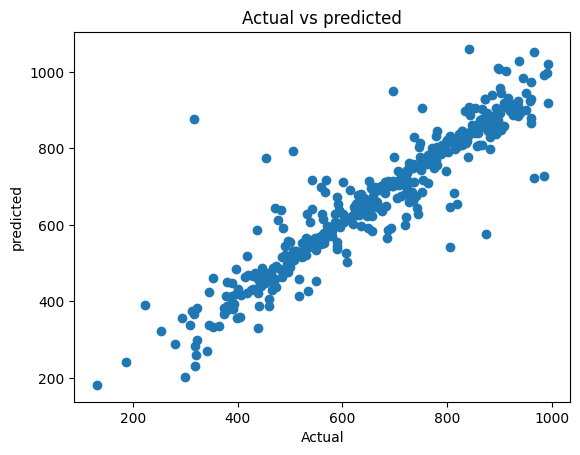

In [70]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [71]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 2ms/step


,Actual,predict,differences
431,529,541.324890,-12.324890
610,624,631.991638,-7.991638
795,635,660.414246,-25.414246
1238,929,893.323486,35.676514
1228,890,883.746521,6.253479
794,656,622.831848,33.168152
642,645,642.850525,2.149475
416,443,449.262299,-6.262299
1410,898,1009.896118,-111.896118
517,494,498.857269,-4.857269


## RNN

In [72]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [73]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 29s 195ms/step - loss: 433207.3438 - mae: 632.1487 - val_loss: 219037.3906 - val_mae: 455.2669
Epoch 2/2000
22/22 [==============================] - 1s 38ms/step - loss: 125560.9922 - mae: 286.2084 - val_loss: 23032.1484 - val_mae: 112.3350
Epoch 3/2000
22/22 [==============================] - 1s 30ms/step - loss: 69473.1484 - mae: 203.0051 - val_loss: 14735.7891 - val_mae: 91.4757
Epoch 4/2000
22/22 [==============================] - 1s 29ms/step - loss: 54362.7656 - mae: 183.0734 - val_loss: 11359.0078 - val_mae: 90.1472
Epoch 5/2000
22/22 [==============================] - 1s 28ms/step - loss: 48633.4570 - mae: 171.7547 - val_loss: 10811.9697 - val_mae: 79.6070
Epoch 6/2000
22/22 [==============================] - 1s 28ms/step - loss: 46377.3242 - mae: 171.5611 - val_loss: 8732.9932 - val_mae: 71.5318
Epoch 7/2000
22/22 [==============================] - 1s 30ms/step - loss: 43313.4023 - mae: 166.5986 - val_loss: 15286.4854 - val

22/22 [==============================] - 1s 30ms/step - loss: 20802.5000 - mae: 112.4994 - val_loss: 17219.1016 - val_mae: 108.0421
Epoch 114/2000
22/22 [==============================] - 1s 31ms/step - loss: 19180.1504 - mae: 107.0547 - val_loss: 11702.8340 - val_mae: 85.3144
Epoch 115/2000
22/22 [==============================] - 1s 33ms/step - loss: 19991.4746 - mae: 112.2188 - val_loss: 8566.6162 - val_mae: 73.9714
Epoch 116/2000
22/22 [==============================] - 1s 28ms/step - loss: 19500.8770 - mae: 108.1380 - val_loss: 17497.0293 - val_mae: 108.0288
Epoch 117/2000
22/22 [==============================] - 1s 29ms/step - loss: 19270.9473 - mae: 106.3093 - val_loss: 18208.1973 - val_mae: 110.6447
Epoch 118/2000
22/22 [==============================] - 1s 26ms/step - loss: 17879.0625 - mae: 104.3745 - val_loss: 15306.6279 - val_mae: 102.2016
Epoch 119/2000
22/22 [==============================] - 1s 32ms/step - loss: 18463.9727 - mae: 106.9735 - val_loss: 14576.6240 - val_mae

22/22 [==============================] - 1s 26ms/step - loss: 18054.1973 - mae: 105.2017 - val_loss: 9930.5918 - val_mae: 80.4329
Epoch 226/2000
22/22 [==============================] - 1s 32ms/step - loss: 16158.0264 - mae: 98.7655 - val_loss: 7400.3506 - val_mae: 64.9524
Epoch 227/2000
22/22 [==============================] - 1s 27ms/step - loss: 15833.9307 - mae: 98.1482 - val_loss: 12122.2344 - val_mae: 89.8774
Epoch 228/2000
22/22 [==============================] - 1s 26ms/step - loss: 16811.0742 - mae: 100.0234 - val_loss: 6947.8901 - val_mae: 60.1131
Epoch 229/2000
22/22 [==============================] - 1s 31ms/step - loss: 17484.6973 - mae: 102.6047 - val_loss: 6967.4473 - val_mae: 64.3356
Epoch 230/2000
22/22 [==============================] - 1s 26ms/step - loss: 14860.1123 - mae: 95.6395 - val_loss: 6016.0200 - val_mae: 56.9285
Epoch 231/2000
22/22 [==============================] - 1s 25ms/step - loss: 16225.7900 - mae: 98.6627 - val_loss: 6398.8271 - val_mae: 62.8309
Epo

Epoch 282/2000
22/22 [==============================] - 1s 26ms/step - loss: 16738.4707 - mae: 100.5733 - val_loss: 4719.2158 - val_mae: 44.2948
Epoch 283/2000
22/22 [==============================] - 1s 28ms/step - loss: 14430.5693 - mae: 92.6948 - val_loss: 8271.2949 - val_mae: 76.5218
Epoch 284/2000
22/22 [==============================] - 1s 29ms/step - loss: 15386.2734 - mae: 95.0997 - val_loss: 7728.3618 - val_mae: 69.1030
Epoch 285/2000
22/22 [==============================] - 1s 27ms/step - loss: 16913.1406 - mae: 101.6077 - val_loss: 5816.9609 - val_mae: 55.5015
Epoch 286/2000
22/22 [==============================] - 1s 29ms/step - loss: 15734.1055 - mae: 97.8777 - val_loss: 8503.2520 - val_mae: 77.3974
Epoch 287/2000
22/22 [==============================] - 1s 31ms/step - loss: 17590.1855 - mae: 104.2905 - val_loss: 15934.6660 - val_mae: 110.0438
Epoch 288/2000
22/22 [==============================] - 1s 28ms/step - loss: 14757.9766 - mae: 95.5172 - val_loss: 5616.4380 - val_

Epoch 339/2000
22/22 [==============================] - 1s 28ms/step - loss: 14429.2578 - mae: 95.0426 - val_loss: 4416.2549 - val_mae: 43.2686
Epoch 340/2000
22/22 [==============================] - 1s 26ms/step - loss: 16803.3809 - mae: 100.7148 - val_loss: 9984.7002 - val_mae: 85.0899
Epoch 341/2000
22/22 [==============================] - 1s 25ms/step - loss: 15381.6855 - mae: 94.1439 - val_loss: 5281.7959 - val_mae: 54.3274
Epoch 342/2000
22/22 [==============================] - 1s 29ms/step - loss: 15056.8945 - mae: 96.0888 - val_loss: 5474.6826 - val_mae: 51.0861
Epoch 343/2000
22/22 [==============================] - 1s 29ms/step - loss: 17211.4102 - mae: 101.5984 - val_loss: 12015.3369 - val_mae: 90.0423
Epoch 344/2000
22/22 [==============================] - 1s 26ms/step - loss: 15674.9492 - mae: 96.2742 - val_loss: 6638.3169 - val_mae: 61.8513
Epoch 345/2000
22/22 [==============================] - 1s 31ms/step - loss: 14570.4932 - mae: 94.9911 - val_loss: 6605.7124 - val_ma

Epoch 396/2000
22/22 [==============================] - 1s 32ms/step - loss: 16607.7344 - mae: 98.5379 - val_loss: 7521.4414 - val_mae: 62.5323
Epoch 397/2000
22/22 [==============================] - 1s 25ms/step - loss: 16014.7432 - mae: 96.9309 - val_loss: 10580.2559 - val_mae: 88.4073
Epoch 398/2000
22/22 [==============================] - 1s 26ms/step - loss: 13655.1699 - mae: 90.8635 - val_loss: 5777.9033 - val_mae: 52.7572
Epoch 399/2000
22/22 [==============================] - 1s 28ms/step - loss: 16413.7734 - mae: 102.0985 - val_loss: 9366.3281 - val_mae: 79.7266
Epoch 400/2000
22/22 [==============================] - 1s 26ms/step - loss: 15387.5967 - mae: 95.8386 - val_loss: 4896.9160 - val_mae: 46.2460
Epoch 401/2000
22/22 [==============================] - 1s 34ms/step - loss: 14519.6064 - mae: 93.5970 - val_loss: 4691.8750 - val_mae: 46.5719
Epoch 402/2000
22/22 [==============================] - 1s 29ms/step - loss: 14041.2578 - mae: 92.1961 - val_loss: 6922.2754 - val_mae

Epoch 453/2000
22/22 [==============================] - 1s 27ms/step - loss: 14494.8945 - mae: 92.7020 - val_loss: 4170.0576 - val_mae: 39.8949
Epoch 454/2000
22/22 [==============================] - 1s 28ms/step - loss: 14455.0635 - mae: 91.8880 - val_loss: 5046.6777 - val_mae: 47.9360
Epoch 455/2000
22/22 [==============================] - 1s 27ms/step - loss: 13819.3457 - mae: 93.2791 - val_loss: 5700.0879 - val_mae: 58.3929
Epoch 456/2000
22/22 [==============================] - 1s 29ms/step - loss: 13718.8721 - mae: 92.6985 - val_loss: 11900.9795 - val_mae: 93.1191
Epoch 457/2000
22/22 [==============================] - 1s 25ms/step - loss: 13711.8301 - mae: 92.1366 - val_loss: 5538.5737 - val_mae: 50.3864
Epoch 458/2000
22/22 [==============================] - 1s 25ms/step - loss: 14378.8604 - mae: 92.4199 - val_loss: 9346.6992 - val_mae: 80.3333
Epoch 459/2000
22/22 [==============================] - 1s 27ms/step - loss: 14204.0674 - mae: 92.0126 - val_loss: 5603.8032 - val_mae:

Epoch 510/2000
22/22 [==============================] - 1s 26ms/step - loss: 14257.2998 - mae: 92.9735 - val_loss: 6350.5806 - val_mae: 61.3238
Epoch 511/2000
22/22 [==============================] - 1s 27ms/step - loss: 13452.9238 - mae: 88.1929 - val_loss: 10182.9453 - val_mae: 87.4298
Epoch 512/2000
22/22 [==============================] - 1s 28ms/step - loss: 14012.2363 - mae: 91.2643 - val_loss: 5916.7891 - val_mae: 59.9536
Epoch 513/2000
22/22 [==============================] - 1s 28ms/step - loss: 14678.1123 - mae: 92.2857 - val_loss: 5708.2368 - val_mae: 53.3674
Epoch 514/2000
22/22 [==============================] - 1s 27ms/step - loss: 13007.2305 - mae: 86.8770 - val_loss: 8877.3525 - val_mae: 74.4198
Epoch 515/2000
22/22 [==============================] - 1s 28ms/step - loss: 14348.4971 - mae: 94.1036 - val_loss: 4328.5327 - val_mae: 40.6345
Epoch 516/2000
22/22 [==============================] - 1s 32ms/step - loss: 15529.8633 - mae: 97.7162 - val_loss: 9251.5430 - val_mae:

Epoch 567/2000
22/22 [==============================] - 1s 39ms/step - loss: 14777.7969 - mae: 95.4586 - val_loss: 7113.7324 - val_mae: 71.5210
Epoch 568/2000
22/22 [==============================] - 1s 34ms/step - loss: 13648.9551 - mae: 91.5844 - val_loss: 4603.6089 - val_mae: 40.5194
Epoch 569/2000
22/22 [==============================] - 1s 41ms/step - loss: 15719.9180 - mae: 97.6975 - val_loss: 12810.3662 - val_mae: 97.0444
Epoch 570/2000
22/22 [==============================] - 1s 37ms/step - loss: 14578.2910 - mae: 92.8560 - val_loss: 4620.6641 - val_mae: 47.7112
Epoch 571/2000
22/22 [==============================] - 1s 37ms/step - loss: 13695.7520 - mae: 91.2711 - val_loss: 7491.2549 - val_mae: 64.9446
Epoch 572/2000
22/22 [==============================] - 1s 36ms/step - loss: 14865.7393 - mae: 93.5635 - val_loss: 5439.8320 - val_mae: 55.9573
Epoch 573/2000
22/22 [==============================] - 1s 43ms/step - loss: 13477.8330 - mae: 91.2378 - val_loss: 6639.7231 - val_mae:

Epoch 624/2000
22/22 [==============================] - 1s 45ms/step - loss: 12368.9492 - mae: 86.3606 - val_loss: 7853.3296 - val_mae: 74.9538
Epoch 625/2000
22/22 [==============================] - 1s 34ms/step - loss: 12836.2217 - mae: 88.5411 - val_loss: 5003.2964 - val_mae: 51.6813
Epoch 626/2000
22/22 [==============================] - 1s 43ms/step - loss: 14021.3008 - mae: 91.2596 - val_loss: 4953.8340 - val_mae: 51.5435
Epoch 627/2000
22/22 [==============================] - 1s 42ms/step - loss: 15054.6943 - mae: 96.3943 - val_loss: 9692.6729 - val_mae: 82.2149
Epoch 628/2000
22/22 [==============================] - 1s 39ms/step - loss: 14851.4912 - mae: 95.7177 - val_loss: 6492.3379 - val_mae: 62.3727
Epoch 629/2000
22/22 [==============================] - 1s 42ms/step - loss: 13168.5918 - mae: 88.0412 - val_loss: 6597.6436 - val_mae: 66.3681
Epoch 630/2000
22/22 [==============================] - 1s 36ms/step - loss: 13664.1611 - mae: 90.8929 - val_loss: 6231.0752 - val_mae: 

Epoch 681/2000
22/22 [==============================] - 1s 37ms/step - loss: 13965.9795 - mae: 91.1266 - val_loss: 6719.2275 - val_mae: 58.6592
Epoch 682/2000
22/22 [==============================] - 1s 38ms/step - loss: 15010.7266 - mae: 94.2404 - val_loss: 5541.0044 - val_mae: 50.8809
Epoch 683/2000
22/22 [==============================] - 1s 41ms/step - loss: 12852.4297 - mae: 88.5859 - val_loss: 7070.2568 - val_mae: 65.6608
Epoch 684/2000
22/22 [==============================] - 1s 35ms/step - loss: 12164.0879 - mae: 85.8509 - val_loss: 5500.7354 - val_mae: 56.5606
Epoch 685/2000
22/22 [==============================] - 1s 39ms/step - loss: 13532.5850 - mae: 91.3624 - val_loss: 9434.9492 - val_mae: 73.1796
Epoch 686/2000
22/22 [==============================] - 1s 37ms/step - loss: 14777.5039 - mae: 94.1112 - val_loss: 7101.9932 - val_mae: 67.9291
Epoch 687/2000
22/22 [==============================] - 1s 34ms/step - loss: 13062.8477 - mae: 87.6959 - val_loss: 5978.4688 - val_mae: 

Epoch 738/2000
22/22 [==============================] - 1s 32ms/step - loss: 13632.8613 - mae: 89.6330 - val_loss: 4953.0200 - val_mae: 49.9852
Epoch 739/2000
22/22 [==============================] - 1s 37ms/step - loss: 13200.0332 - mae: 87.0926 - val_loss: 9628.6641 - val_mae: 83.2647
Epoch 740/2000
22/22 [==============================] - 1s 34ms/step - loss: 12220.5938 - mae: 86.0009 - val_loss: 7126.8071 - val_mae: 68.6332
Epoch 741/2000
22/22 [==============================] - 1s 39ms/step - loss: 12277.0518 - mae: 85.3839 - val_loss: 5697.0981 - val_mae: 52.9118
Epoch 742/2000
22/22 [==============================] - 1s 36ms/step - loss: 13268.4053 - mae: 89.3081 - val_loss: 5518.8877 - val_mae: 51.4603
Epoch 743/2000
22/22 [==============================] - 1s 40ms/step - loss: 13219.5869 - mae: 87.7515 - val_loss: 4822.3911 - val_mae: 46.7660
Epoch 744/2000
22/22 [==============================] - 1s 39ms/step - loss: 12766.1992 - mae: 87.9626 - val_loss: 7311.3740 - val_mae: 

Epoch 795/2000
22/22 [==============================] - 1s 44ms/step - loss: 13809.4053 - mae: 91.1871 - val_loss: 5841.5962 - val_mae: 58.0718
Epoch 796/2000
22/22 [==============================] - 1s 45ms/step - loss: 12725.5977 - mae: 86.7346 - val_loss: 7712.7734 - val_mae: 72.4685
Epoch 797/2000
22/22 [==============================] - 1s 37ms/step - loss: 13524.1094 - mae: 90.8124 - val_loss: 6742.4209 - val_mae: 68.3054
Epoch 798/2000
22/22 [==============================] - 1s 41ms/step - loss: 13504.5059 - mae: 89.9098 - val_loss: 6640.2603 - val_mae: 65.2586
Epoch 799/2000
22/22 [==============================] - 1s 43ms/step - loss: 13156.1152 - mae: 88.7372 - val_loss: 7448.6064 - val_mae: 63.8171
Epoch 800/2000
22/22 [==============================] - 1s 42ms/step - loss: 13491.0840 - mae: 90.4960 - val_loss: 4631.9775 - val_mae: 43.9876
Epoch 801/2000
22/22 [==============================] - 1s 40ms/step - loss: 13182.8311 - mae: 89.2360 - val_loss: 8810.3457 - val_mae: 

Epoch 852/2000
22/22 [==============================] - 1s 34ms/step - loss: 13338.6279 - mae: 88.5152 - val_loss: 5261.0820 - val_mae: 53.6618
Epoch 853/2000
22/22 [==============================] - 1s 36ms/step - loss: 13033.8340 - mae: 88.2384 - val_loss: 6963.7559 - val_mae: 66.9536
Epoch 854/2000
22/22 [==============================] - 1s 32ms/step - loss: 12882.9697 - mae: 88.5987 - val_loss: 5675.2881 - val_mae: 57.0083
Epoch 855/2000
22/22 [==============================] - 1s 40ms/step - loss: 12890.2266 - mae: 88.4833 - val_loss: 6648.9819 - val_mae: 64.4380
Epoch 856/2000
22/22 [==============================] - 1s 39ms/step - loss: 13157.2305 - mae: 88.0814 - val_loss: 6735.2344 - val_mae: 66.2516
Epoch 857/2000
22/22 [==============================] - 1s 44ms/step - loss: 13730.4033 - mae: 89.4908 - val_loss: 6600.3726 - val_mae: 61.8993
Epoch 858/2000
22/22 [==============================] - 1s 39ms/step - loss: 13153.5879 - mae: 88.2008 - val_loss: 4761.5869 - val_mae: 

Epoch 909/2000
22/22 [==============================] - 1s 44ms/step - loss: 15026.4121 - mae: 96.9154 - val_loss: 4296.4531 - val_mae: 42.8845
Epoch 910/2000
22/22 [==============================] - 1s 39ms/step - loss: 12923.2930 - mae: 88.5899 - val_loss: 4355.9629 - val_mae: 43.6748
Epoch 911/2000
22/22 [==============================] - 1s 37ms/step - loss: 13997.7217 - mae: 91.8412 - val_loss: 9152.0439 - val_mae: 80.7417
Epoch 912/2000
22/22 [==============================] - 1s 38ms/step - loss: 16200.4121 - mae: 98.7653 - val_loss: 11078.5762 - val_mae: 91.7053
Epoch 913/2000
22/22 [==============================] - 1s 38ms/step - loss: 13827.7764 - mae: 91.8624 - val_loss: 7642.9897 - val_mae: 70.5532
Epoch 914/2000
22/22 [==============================] - 1s 38ms/step - loss: 14500.5215 - mae: 93.5025 - val_loss: 7073.7485 - val_mae: 62.7495
Epoch 915/2000
22/22 [==============================] - 1s 40ms/step - loss: 14629.1250 - mae: 92.4849 - val_loss: 5551.6782 - val_mae:

Epoch 966/2000
22/22 [==============================] - 1s 36ms/step - loss: 13101.8672 - mae: 87.7051 - val_loss: 5525.9736 - val_mae: 53.6770
Epoch 967/2000
22/22 [==============================] - 1s 40ms/step - loss: 11179.2129 - mae: 83.1676 - val_loss: 5412.5762 - val_mae: 54.5165
Epoch 968/2000
22/22 [==============================] - 1s 34ms/step - loss: 12594.8574 - mae: 87.1224 - val_loss: 5236.8096 - val_mae: 48.4314
Epoch 969/2000
22/22 [==============================] - 1s 36ms/step - loss: 13178.2949 - mae: 88.2463 - val_loss: 4535.9751 - val_mae: 44.2148
Epoch 970/2000
22/22 [==============================] - 1s 43ms/step - loss: 14452.7666 - mae: 91.8186 - val_loss: 4818.3496 - val_mae: 44.7252
Epoch 971/2000
22/22 [==============================] - 1s 39ms/step - loss: 14292.4668 - mae: 92.5269 - val_loss: 6275.7783 - val_mae: 63.6718
Epoch 972/2000
22/22 [==============================] - 1s 51ms/step - loss: 12461.5791 - mae: 87.9367 - val_loss: 4327.6265 - val_mae: 

Epoch 1023/2000
22/22 [==============================] - 1s 45ms/step - loss: 13293.9971 - mae: 88.3259 - val_loss: 6398.0024 - val_mae: 58.5950
Epoch 1024/2000
22/22 [==============================] - 1s 37ms/step - loss: 13002.6963 - mae: 88.1813 - val_loss: 4806.3086 - val_mae: 49.3982
Epoch 1025/2000
22/22 [==============================] - 1s 47ms/step - loss: 12485.3574 - mae: 86.7812 - val_loss: 6979.7363 - val_mae: 68.2288
Epoch 1026/2000
22/22 [==============================] - 1s 38ms/step - loss: 14680.5996 - mae: 95.5015 - val_loss: 10615.8008 - val_mae: 88.5156
Epoch 1027/2000
22/22 [==============================] - 1s 36ms/step - loss: 14082.6963 - mae: 91.4448 - val_loss: 4795.9658 - val_mae: 42.7222
Epoch 1028/2000
22/22 [==============================] - 1s 38ms/step - loss: 12675.5762 - mae: 87.2614 - val_loss: 4860.8257 - val_mae: 49.5177
Epoch 1029/2000
22/22 [==============================] - 1s 32ms/step - loss: 13069.3613 - mae: 89.0231 - val_loss: 7572.9824 - v

22/22 [==============================] - 1s 33ms/step - loss: 14215.8857 - mae: 92.3322 - val_loss: 7531.0278 - val_mae: 64.6751
Epoch 1136/2000
22/22 [==============================] - 1s 38ms/step - loss: 13524.9297 - mae: 90.0821 - val_loss: 4410.2095 - val_mae: 40.6818
Epoch 1137/2000
22/22 [==============================] - 1s 35ms/step - loss: 13290.3027 - mae: 90.6454 - val_loss: 4471.6768 - val_mae: 40.3958
Epoch 1138/2000
22/22 [==============================] - 1s 43ms/step - loss: 13173.7930 - mae: 88.9440 - val_loss: 7070.6240 - val_mae: 68.3345
Epoch 1139/2000
22/22 [==============================] - 1s 43ms/step - loss: 13723.3359 - mae: 90.5228 - val_loss: 5999.1621 - val_mae: 57.1457
Epoch 1140/2000
22/22 [==============================] - 1s 37ms/step - loss: 13465.0820 - mae: 88.5327 - val_loss: 4339.6064 - val_mae: 41.8125
Epoch 1141/2000
22/22 [==============================] - 1s 34ms/step - loss: 12614.8174 - mae: 88.6914 - val_loss: 4297.7041 - val_mae: 39.3709
E

22/22 [==============================] - 1s 42ms/step - loss: 12368.0039 - mae: 86.1227 - val_loss: 5443.5923 - val_mae: 51.6610
Epoch 1248/2000
22/22 [==============================] - 1s 48ms/step - loss: 13090.4521 - mae: 89.9870 - val_loss: 6838.7070 - val_mae: 64.4153
Epoch 1249/2000
22/22 [==============================] - 1s 52ms/step - loss: 12755.8428 - mae: 88.1112 - val_loss: 5431.0840 - val_mae: 54.9573
Epoch 1250/2000
22/22 [==============================] - 1s 42ms/step - loss: 11987.2910 - mae: 85.2433 - val_loss: 5239.2842 - val_mae: 51.0496
Epoch 1251/2000
22/22 [==============================] - 1s 39ms/step - loss: 13765.5244 - mae: 89.5339 - val_loss: 5029.9326 - val_mae: 50.2530
Epoch 1252/2000
22/22 [==============================] - 1s 42ms/step - loss: 12739.8447 - mae: 85.6420 - val_loss: 5256.8037 - val_mae: 53.3642
Epoch 1253/2000
22/22 [==============================] - 1s 40ms/step - loss: 12211.8730 - mae: 85.4800 - val_loss: 7579.7910 - val_mae: 67.7007
E

22/22 [==============================] - 1s 36ms/step - loss: 12833.4326 - mae: 87.9025 - val_loss: 6278.0889 - val_mae: 63.2683
Epoch 1360/2000
22/22 [==============================] - 1s 39ms/step - loss: 13746.2578 - mae: 87.9799 - val_loss: 6669.3525 - val_mae: 64.0748
Epoch 1361/2000
22/22 [==============================] - 1s 38ms/step - loss: 13278.2246 - mae: 87.8413 - val_loss: 6239.2334 - val_mae: 62.4179
Epoch 1362/2000
22/22 [==============================] - 1s 34ms/step - loss: 12637.1143 - mae: 88.6658 - val_loss: 6267.4346 - val_mae: 61.7982
Epoch 1363/2000
22/22 [==============================] - 1s 49ms/step - loss: 11361.3252 - mae: 82.2745 - val_loss: 5119.5884 - val_mae: 49.3578
Epoch 1364/2000
22/22 [==============================] - 1s 48ms/step - loss: 11258.5430 - mae: 80.6171 - val_loss: 6148.7627 - val_mae: 59.9098
Epoch 1365/2000
22/22 [==============================] - 1s 41ms/step - loss: 11672.8574 - mae: 82.9432 - val_loss: 6010.7944 - val_mae: 51.8084
E

22/22 [==============================] - 1s 45ms/step - loss: 13715.7578 - mae: 91.1631 - val_loss: 5643.5830 - val_mae: 57.3654
Epoch 1472/2000
22/22 [==============================] - 1s 38ms/step - loss: 11974.9209 - mae: 84.7165 - val_loss: 5851.9731 - val_mae: 56.7528
Epoch 1473/2000
22/22 [==============================] - 1s 35ms/step - loss: 12719.0518 - mae: 86.2485 - val_loss: 9916.7285 - val_mae: 85.0417
Epoch 1474/2000
22/22 [==============================] - 1s 46ms/step - loss: 12254.1367 - mae: 86.4498 - val_loss: 5358.0967 - val_mae: 49.2204
Epoch 1475/2000
22/22 [==============================] - 1s 38ms/step - loss: 11395.3809 - mae: 81.8923 - val_loss: 5384.3350 - val_mae: 54.4912
Epoch 1476/2000
22/22 [==============================] - 1s 39ms/step - loss: 11472.5264 - mae: 83.8837 - val_loss: 5702.4478 - val_mae: 57.5482
Epoch 1477/2000
22/22 [==============================] - 1s 40ms/step - loss: 12055.8086 - mae: 85.9688 - val_loss: 4500.7197 - val_mae: 42.5892
E

22/22 [==============================] - 1s 42ms/step - loss: 12311.1094 - mae: 83.9621 - val_loss: 7069.0200 - val_mae: 67.5497
Epoch 1584/2000
22/22 [==============================] - 1s 39ms/step - loss: 12610.8057 - mae: 86.9160 - val_loss: 5773.7778 - val_mae: 58.8131
Epoch 1585/2000
22/22 [==============================] - 1s 34ms/step - loss: 11055.4854 - mae: 80.6356 - val_loss: 6072.1655 - val_mae: 60.3709
Epoch 1586/2000
22/22 [==============================] - 1s 42ms/step - loss: 12062.8057 - mae: 84.6252 - val_loss: 4619.9419 - val_mae: 44.8602
Epoch 1587/2000
22/22 [==============================] - 1s 29ms/step - loss: 11296.8330 - mae: 82.2490 - val_loss: 7309.8120 - val_mae: 67.9571
Epoch 1588/2000
22/22 [==============================] - 1s 40ms/step - loss: 12636.9131 - mae: 87.6103 - val_loss: 5245.9780 - val_mae: 50.2759
Epoch 1589/2000
22/22 [==============================] - 1s 38ms/step - loss: 11820.2998 - mae: 83.3636 - val_loss: 4755.7588 - val_mae: 44.8866
E

22/22 [==============================] - 1s 41ms/step - loss: 11137.7422 - mae: 81.3839 - val_loss: 6868.8105 - val_mae: 63.3782
Epoch 1696/2000
22/22 [==============================] - 1s 41ms/step - loss: 12690.5674 - mae: 85.7603 - val_loss: 7034.7456 - val_mae: 65.3977
Epoch 1697/2000
22/22 [==============================] - 1s 43ms/step - loss: 11552.0264 - mae: 83.7100 - val_loss: 4538.4834 - val_mae: 44.8757
Epoch 1698/2000
22/22 [==============================] - 1s 33ms/step - loss: 12573.8506 - mae: 86.7349 - val_loss: 4237.7881 - val_mae: 41.1688
Epoch 1699/2000
22/22 [==============================] - 1s 44ms/step - loss: 12284.0488 - mae: 85.7798 - val_loss: 6195.5879 - val_mae: 61.3924
Epoch 1700/2000
22/22 [==============================] - 1s 46ms/step - loss: 11103.0205 - mae: 82.7670 - val_loss: 5043.3149 - val_mae: 46.3610
Epoch 1701/2000
22/22 [==============================] - 1s 48ms/step - loss: 11683.3555 - mae: 83.2913 - val_loss: 5902.1021 - val_mae: 58.9784
E

22/22 [==============================] - 1s 39ms/step - loss: 12193.7852 - mae: 85.0246 - val_loss: 5573.8857 - val_mae: 49.0683
Epoch 1808/2000
22/22 [==============================] - 1s 33ms/step - loss: 11764.4873 - mae: 81.9993 - val_loss: 5730.6396 - val_mae: 57.4140
Epoch 1809/2000
22/22 [==============================] - 1s 41ms/step - loss: 11792.4463 - mae: 83.1496 - val_loss: 5850.7837 - val_mae: 56.8652
Epoch 1810/2000
22/22 [==============================] - 1s 33ms/step - loss: 12846.5010 - mae: 87.6101 - val_loss: 7602.0503 - val_mae: 71.3403
Epoch 1811/2000
22/22 [==============================] - 1s 33ms/step - loss: 13760.0205 - mae: 88.5089 - val_loss: 5130.3257 - val_mae: 52.0568
Epoch 1812/2000
22/22 [==============================] - 1s 43ms/step - loss: 12512.1553 - mae: 84.9126 - val_loss: 5427.9131 - val_mae: 51.4526
Epoch 1813/2000
22/22 [==============================] - 1s 47ms/step - loss: 12365.7354 - mae: 87.1471 - val_loss: 6250.1260 - val_mae: 59.7794
E

22/22 [==============================] - 1s 34ms/step - loss: 12037.4141 - mae: 84.4324 - val_loss: 4775.1724 - val_mae: 44.8084
Epoch 1920/2000
22/22 [==============================] - 1s 34ms/step - loss: 14065.2188 - mae: 92.0027 - val_loss: 6732.6748 - val_mae: 61.5134
Epoch 1921/2000
22/22 [==============================] - 1s 37ms/step - loss: 12250.6543 - mae: 86.3002 - val_loss: 5689.4092 - val_mae: 56.9245
Epoch 1922/2000
22/22 [==============================] - 1s 34ms/step - loss: 11013.4531 - mae: 80.0679 - val_loss: 6223.9897 - val_mae: 59.0511
Epoch 1923/2000
22/22 [==============================] - 1s 38ms/step - loss: 11586.8096 - mae: 82.9110 - val_loss: 6885.0811 - val_mae: 66.4658
Epoch 1924/2000
22/22 [==============================] - 1s 44ms/step - loss: 11840.2158 - mae: 83.9367 - val_loss: 4976.5322 - val_mae: 50.9979
Epoch 1925/2000
22/22 [==============================] - 1s 34ms/step - loss: 11113.0215 - mae: 81.5298 - val_loss: 4998.4565 - val_mae: 49.9607
E

In [74]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

14/14 [==============================] - 6s 6ms/step


0.8295701682069442

In [75]:
prediction =np.squeeze(model3.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 7s 7s/step
Prediction: 461.9395446777344


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 7ms/step
mean squired error: 5665.005788845725
mean absolute error: 55.18890198183731


14/14 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Actual vs predicted')

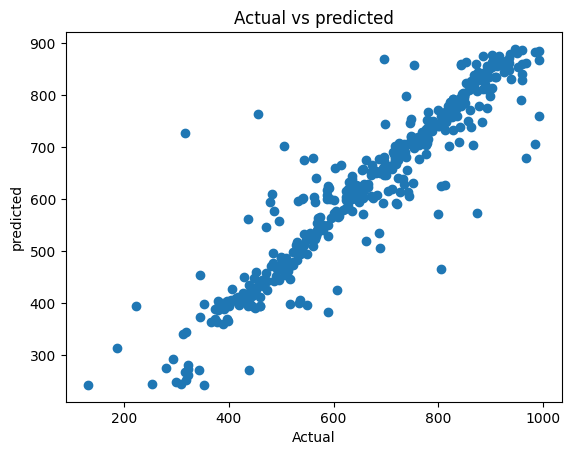

In [77]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [78]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 6ms/step


,Actual,predict,differences
431,529,512.591980,16.408020
610,624,598.584656,25.415344
795,635,618.876404,16.123596
1238,929,857.391968,71.608032
1228,890,839.939636,50.060364
794,656,601.897644,54.102356
642,645,616.084961,28.915039
416,443,425.373383,17.626617
1410,898,835.284729,62.715271
517,494,471.484161,22.515839


## keras tuner with dense

In [79]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_14460\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [80]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [81]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [82]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [83]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 7s 79ms/step - loss: 149.6625 - mean_absolute_error: 149.6625 - val_loss: 74.0846 - val_mean_absolute_error: 74.0846
Epoch 2/2000
22/22 [==============================] - 0s 16ms/step - loss: 73.4983 - mean_absolute_error: 73.4983 - val_loss: 75.0787 - val_mean_absolute_error: 75.0787
Epoch 3/2000
22/22 [==============================] - 0s 17ms/step - loss: 69.4194 - mean_absolute_error: 69.4194 - val_loss: 62.9994 - val_mean_absolute_error: 62.9994
Epoch 4/2000
22/22 [==============================] - 0s 15ms/step - loss: 69.6394 - mean_absolute_error: 69.6394 - val_loss: 128.6490 - val_mean_absolute_error: 128.6490
Epoch 5/2000
22/22 [==============================] - 0s 14ms/step - loss: 87.0809 - mean_absolute_error: 87.0809 - val_loss: 100.6526 - val_mean_absolute_error: 100.6526
Epoch 6/2000
22/22 [==============================] - 0s 15ms/step - loss: 74.0565 - mean_absolute_error: 74.0565 - val_loss: 62.9781 - val_mean_abso

22/22 [==============================] - 0s 12ms/step - loss: 61.7229 - mean_absolute_error: 61.7229 - val_loss: 72.9439 - val_mean_absolute_error: 72.9439
Epoch 98/2000
22/22 [==============================] - 0s 18ms/step - loss: 57.0909 - mean_absolute_error: 57.0909 - val_loss: 61.8721 - val_mean_absolute_error: 61.8721
Epoch 99/2000
22/22 [==============================] - 0s 15ms/step - loss: 54.9300 - mean_absolute_error: 54.9300 - val_loss: 59.3412 - val_mean_absolute_error: 59.3412
Epoch 100/2000
22/22 [==============================] - 0s 17ms/step - loss: 55.3502 - mean_absolute_error: 55.3502 - val_loss: 59.0443 - val_mean_absolute_error: 59.0443
Epoch 101/2000
22/22 [==============================] - 0s 18ms/step - loss: 54.6871 - mean_absolute_error: 54.6871 - val_loss: 57.3685 - val_mean_absolute_error: 57.3685
Epoch 102/2000
22/22 [==============================] - 0s 12ms/step - loss: 60.2534 - mean_absolute_error: 60.2534 - val_loss: 66.3748 - val_mean_absolute_error:

22/22 [==============================] - 0s 10ms/step - loss: 52.9674 - mean_absolute_error: 52.9674 - val_loss: 65.5052 - val_mean_absolute_error: 65.5052
Epoch 146/2000
22/22 [==============================] - 0s 11ms/step - loss: 53.2824 - mean_absolute_error: 53.2824 - val_loss: 52.0794 - val_mean_absolute_error: 52.0794
Epoch 147/2000
22/22 [==============================] - 0s 13ms/step - loss: 52.3009 - mean_absolute_error: 52.3009 - val_loss: 52.4503 - val_mean_absolute_error: 52.4503
Epoch 148/2000
22/22 [==============================] - 0s 13ms/step - loss: 48.6745 - mean_absolute_error: 48.6745 - val_loss: 51.9660 - val_mean_absolute_error: 51.9660
Epoch 149/2000
22/22 [==============================] - 0s 16ms/step - loss: 50.9266 - mean_absolute_error: 50.9266 - val_loss: 52.3725 - val_mean_absolute_error: 52.3725
Epoch 150/2000
22/22 [==============================] - 0s 13ms/step - loss: 50.2545 - mean_absolute_error: 50.2545 - val_loss: 57.8328 - val_mean_absolute_erro

22/22 [==============================] - 0s 19ms/step - loss: 53.3576 - mean_absolute_error: 53.3576 - val_loss: 50.3831 - val_mean_absolute_error: 50.3831
Epoch 194/2000
22/22 [==============================] - 0s 13ms/step - loss: 52.1899 - mean_absolute_error: 52.1899 - val_loss: 52.7273 - val_mean_absolute_error: 52.7273
Epoch 195/2000
22/22 [==============================] - 0s 20ms/step - loss: 49.2759 - mean_absolute_error: 49.2759 - val_loss: 51.8521 - val_mean_absolute_error: 51.8521
Epoch 196/2000
22/22 [==============================] - 0s 18ms/step - loss: 49.8610 - mean_absolute_error: 49.8610 - val_loss: 50.7702 - val_mean_absolute_error: 50.7702
Epoch 197/2000
22/22 [==============================] - 0s 19ms/step - loss: 49.1079 - mean_absolute_error: 49.1079 - val_loss: 50.7853 - val_mean_absolute_error: 50.7853
Epoch 198/2000
22/22 [==============================] - 0s 20ms/step - loss: 46.9671 - mean_absolute_error: 46.9671 - val_loss: 52.2150 - val_mean_absolute_erro

22/22 [==============================] - 0s 15ms/step - loss: 56.4963 - mean_absolute_error: 56.4963 - val_loss: 58.9160 - val_mean_absolute_error: 58.9160
Epoch 242/2000
22/22 [==============================] - 0s 17ms/step - loss: 53.3132 - mean_absolute_error: 53.3132 - val_loss: 49.4424 - val_mean_absolute_error: 49.4424
Epoch 243/2000
22/22 [==============================] - 0s 13ms/step - loss: 54.9388 - mean_absolute_error: 54.9388 - val_loss: 68.7395 - val_mean_absolute_error: 68.7395
Epoch 244/2000
22/22 [==============================] - 0s 16ms/step - loss: 63.2350 - mean_absolute_error: 63.2350 - val_loss: 62.8108 - val_mean_absolute_error: 62.8108
Epoch 245/2000
22/22 [==============================] - 0s 15ms/step - loss: 49.3655 - mean_absolute_error: 49.3655 - val_loss: 56.0935 - val_mean_absolute_error: 56.0935
Epoch 246/2000
22/22 [==============================] - 0s 18ms/step - loss: 51.8079 - mean_absolute_error: 51.8079 - val_loss: 54.4534 - val_mean_absolute_erro

Epoch 289/2000
22/22 [==============================] - 0s 17ms/step - loss: 50.2507 - mean_absolute_error: 50.2507 - val_loss: 59.6827 - val_mean_absolute_error: 59.6827
Epoch 290/2000
22/22 [==============================] - 0s 20ms/step - loss: 51.0812 - mean_absolute_error: 51.0812 - val_loss: 50.9677 - val_mean_absolute_error: 50.9677
Epoch 291/2000
22/22 [==============================] - 0s 20ms/step - loss: 48.9225 - mean_absolute_error: 48.9225 - val_loss: 50.3487 - val_mean_absolute_error: 50.3487
Epoch 292/2000
22/22 [==============================] - 0s 12ms/step - loss: 49.6060 - mean_absolute_error: 49.6060 - val_loss: 48.6002 - val_mean_absolute_error: 48.6002
Epoch 293/2000
22/22 [==============================] - 0s 20ms/step - loss: 47.9725 - mean_absolute_error: 47.9725 - val_loss: 52.0864 - val_mean_absolute_error: 52.0864
Epoch 294/2000
22/22 [==============================] - 0s 9ms/step - loss: 47.5357 - mean_absolute_error: 47.5357 - val_loss: 49.8106 - val_mean

Epoch 337/2000
22/22 [==============================] - 0s 7ms/step - loss: 52.4585 - mean_absolute_error: 52.4585 - val_loss: 54.4068 - val_mean_absolute_error: 54.4068
Epoch 338/2000
22/22 [==============================] - 0s 14ms/step - loss: 46.8453 - mean_absolute_error: 46.8453 - val_loss: 50.4394 - val_mean_absolute_error: 50.4394
Epoch 339/2000
22/22 [==============================] - 0s 14ms/step - loss: 47.2776 - mean_absolute_error: 47.2776 - val_loss: 48.8977 - val_mean_absolute_error: 48.8977
Epoch 340/2000
22/22 [==============================] - 0s 20ms/step - loss: 50.6279 - mean_absolute_error: 50.6279 - val_loss: 48.7700 - val_mean_absolute_error: 48.7700
Epoch 341/2000
22/22 [==============================] - 0s 8ms/step - loss: 49.3303 - mean_absolute_error: 49.3303 - val_loss: 47.3339 - val_mean_absolute_error: 47.3339
Epoch 342/2000
22/22 [==============================] - 0s 16ms/step - loss: 45.2364 - mean_absolute_error: 45.2364 - val_loss: 52.8149 - val_mean_

Epoch 385/2000
22/22 [==============================] - 0s 13ms/step - loss: 46.0769 - mean_absolute_error: 46.0769 - val_loss: 53.0960 - val_mean_absolute_error: 53.0960
Epoch 386/2000
22/22 [==============================] - 0s 15ms/step - loss: 48.6940 - mean_absolute_error: 48.6940 - val_loss: 49.8661 - val_mean_absolute_error: 49.8661
Epoch 387/2000
22/22 [==============================] - 0s 9ms/step - loss: 45.7619 - mean_absolute_error: 45.7619 - val_loss: 48.6591 - val_mean_absolute_error: 48.6591
Epoch 388/2000
22/22 [==============================] - 0s 14ms/step - loss: 47.8737 - mean_absolute_error: 47.8737 - val_loss: 58.4090 - val_mean_absolute_error: 58.4090
Epoch 389/2000
22/22 [==============================] - 0s 12ms/step - loss: 51.4255 - mean_absolute_error: 51.4255 - val_loss: 48.7484 - val_mean_absolute_error: 48.7484
Epoch 390/2000
22/22 [==============================] - 0s 15ms/step - loss: 51.1370 - mean_absolute_error: 51.1370 - val_loss: 53.3740 - val_mean

Epoch 433/2000
22/22 [==============================] - 1s 24ms/step - loss: 57.5397 - mean_absolute_error: 57.5397 - val_loss: 73.4461 - val_mean_absolute_error: 73.4461
Epoch 434/2000
22/22 [==============================] - 0s 17ms/step - loss: 57.6585 - mean_absolute_error: 57.6585 - val_loss: 50.4394 - val_mean_absolute_error: 50.4394
Epoch 435/2000
22/22 [==============================] - 1s 25ms/step - loss: 46.6827 - mean_absolute_error: 46.6827 - val_loss: 53.7653 - val_mean_absolute_error: 53.7653
Epoch 436/2000
22/22 [==============================] - 0s 22ms/step - loss: 49.3472 - mean_absolute_error: 49.3472 - val_loss: 51.0247 - val_mean_absolute_error: 51.0247
Epoch 437/2000
22/22 [==============================] - 0s 22ms/step - loss: 48.4907 - mean_absolute_error: 48.4907 - val_loss: 52.0668 - val_mean_absolute_error: 52.0668
Epoch 438/2000
22/22 [==============================] - 0s 16ms/step - loss: 46.6156 - mean_absolute_error: 46.6156 - val_loss: 50.4743 - val_mea

Epoch 481/2000
22/22 [==============================] - 1s 24ms/step - loss: 45.1747 - mean_absolute_error: 45.1747 - val_loss: 50.8975 - val_mean_absolute_error: 50.8975
Epoch 482/2000
22/22 [==============================] - 0s 20ms/step - loss: 49.3631 - mean_absolute_error: 49.3631 - val_loss: 48.6484 - val_mean_absolute_error: 48.6484
Epoch 483/2000
22/22 [==============================] - 0s 19ms/step - loss: 52.5214 - mean_absolute_error: 52.5214 - val_loss: 45.9582 - val_mean_absolute_error: 45.9582
Epoch 484/2000
22/22 [==============================] - 1s 28ms/step - loss: 47.5725 - mean_absolute_error: 47.5725 - val_loss: 48.9174 - val_mean_absolute_error: 48.9174
Epoch 485/2000
22/22 [==============================] - 1s 29ms/step - loss: 49.0615 - mean_absolute_error: 49.0615 - val_loss: 50.5411 - val_mean_absolute_error: 50.5411
Epoch 486/2000
22/22 [==============================] - 0s 16ms/step - loss: 48.4453 - mean_absolute_error: 48.4453 - val_loss: 54.5720 - val_mea

Epoch 529/2000
22/22 [==============================] - 0s 16ms/step - loss: 44.0609 - mean_absolute_error: 44.0609 - val_loss: 46.4653 - val_mean_absolute_error: 46.4653
Epoch 530/2000
22/22 [==============================] - 0s 23ms/step - loss: 45.9112 - mean_absolute_error: 45.9112 - val_loss: 49.2730 - val_mean_absolute_error: 49.2730
Epoch 531/2000
22/22 [==============================] - 0s 23ms/step - loss: 46.1432 - mean_absolute_error: 46.1432 - val_loss: 75.1659 - val_mean_absolute_error: 75.1659
Epoch 532/2000
22/22 [==============================] - 1s 24ms/step - loss: 57.5520 - mean_absolute_error: 57.5520 - val_loss: 45.8030 - val_mean_absolute_error: 45.8030
Epoch 533/2000
22/22 [==============================] - 0s 19ms/step - loss: 47.0037 - mean_absolute_error: 47.0037 - val_loss: 46.2563 - val_mean_absolute_error: 46.2563
Epoch 534/2000
22/22 [==============================] - 1s 26ms/step - loss: 47.0660 - mean_absolute_error: 47.0660 - val_loss: 45.5690 - val_mea

Epoch 577/2000
22/22 [==============================] - 0s 23ms/step - loss: 47.3554 - mean_absolute_error: 47.3554 - val_loss: 49.5420 - val_mean_absolute_error: 49.5420
Epoch 578/2000
22/22 [==============================] - 1s 28ms/step - loss: 46.4936 - mean_absolute_error: 46.4936 - val_loss: 47.8462 - val_mean_absolute_error: 47.8462
Epoch 579/2000
22/22 [==============================] - 0s 20ms/step - loss: 49.9143 - mean_absolute_error: 49.9143 - val_loss: 44.3888 - val_mean_absolute_error: 44.3888
Epoch 580/2000
22/22 [==============================] - 1s 25ms/step - loss: 46.1091 - mean_absolute_error: 46.1091 - val_loss: 48.0705 - val_mean_absolute_error: 48.0705
Epoch 581/2000
22/22 [==============================] - 1s 26ms/step - loss: 45.9860 - mean_absolute_error: 45.9860 - val_loss: 46.9606 - val_mean_absolute_error: 46.9606
Epoch 582/2000
22/22 [==============================] - 0s 18ms/step - loss: 44.7849 - mean_absolute_error: 44.7849 - val_loss: 52.4827 - val_mea

Epoch 625/2000
22/22 [==============================] - 1s 26ms/step - loss: 42.5536 - mean_absolute_error: 42.5536 - val_loss: 48.8898 - val_mean_absolute_error: 48.8898
Epoch 626/2000
22/22 [==============================] - 0s 15ms/step - loss: 43.1822 - mean_absolute_error: 43.1822 - val_loss: 47.5017 - val_mean_absolute_error: 47.5017
Epoch 627/2000
22/22 [==============================] - 0s 18ms/step - loss: 45.9127 - mean_absolute_error: 45.9127 - val_loss: 44.0335 - val_mean_absolute_error: 44.0335
Epoch 628/2000
22/22 [==============================] - 0s 17ms/step - loss: 45.7547 - mean_absolute_error: 45.7547 - val_loss: 44.8368 - val_mean_absolute_error: 44.8368
Epoch 629/2000
22/22 [==============================] - 0s 22ms/step - loss: 53.0283 - mean_absolute_error: 53.0283 - val_loss: 82.1053 - val_mean_absolute_error: 82.1053
Epoch 630/2000
22/22 [==============================] - 0s 16ms/step - loss: 56.5333 - mean_absolute_error: 56.5333 - val_loss: 50.7363 - val_mea

Epoch 673/2000
22/22 [==============================] - 0s 17ms/step - loss: 44.6048 - mean_absolute_error: 44.6048 - val_loss: 44.0239 - val_mean_absolute_error: 44.0239
Epoch 674/2000
22/22 [==============================] - 0s 19ms/step - loss: 43.5306 - mean_absolute_error: 43.5306 - val_loss: 44.4662 - val_mean_absolute_error: 44.4662
Epoch 675/2000
22/22 [==============================] - 0s 12ms/step - loss: 43.3159 - mean_absolute_error: 43.3159 - val_loss: 49.3609 - val_mean_absolute_error: 49.3609
Epoch 676/2000
22/22 [==============================] - 1s 33ms/step - loss: 43.3829 - mean_absolute_error: 43.3829 - val_loss: 48.4658 - val_mean_absolute_error: 48.4658
Epoch 677/2000
22/22 [==============================] - 1s 27ms/step - loss: 41.1282 - mean_absolute_error: 41.1282 - val_loss: 44.2603 - val_mean_absolute_error: 44.2603
Epoch 678/2000
22/22 [==============================] - 0s 19ms/step - loss: 45.2454 - mean_absolute_error: 45.2454 - val_loss: 48.9484 - val_mea

Epoch 721/2000
22/22 [==============================] - 0s 19ms/step - loss: 44.4299 - mean_absolute_error: 44.4299 - val_loss: 44.7509 - val_mean_absolute_error: 44.7509
Epoch 722/2000
22/22 [==============================] - 0s 24ms/step - loss: 45.6661 - mean_absolute_error: 45.6661 - val_loss: 44.6868 - val_mean_absolute_error: 44.6868
Epoch 723/2000
22/22 [==============================] - 0s 16ms/step - loss: 45.1592 - mean_absolute_error: 45.1592 - val_loss: 47.3136 - val_mean_absolute_error: 47.3136
Epoch 724/2000
22/22 [==============================] - 1s 28ms/step - loss: 43.9650 - mean_absolute_error: 43.9650 - val_loss: 51.9240 - val_mean_absolute_error: 51.9240
Epoch 725/2000
22/22 [==============================] - 0s 18ms/step - loss: 46.7898 - mean_absolute_error: 46.7898 - val_loss: 44.7329 - val_mean_absolute_error: 44.7329
Epoch 726/2000
22/22 [==============================] - 0s 20ms/step - loss: 42.8123 - mean_absolute_error: 42.8123 - val_loss: 49.0956 - val_mea

Epoch 769/2000
22/22 [==============================] - 0s 21ms/step - loss: 47.7651 - mean_absolute_error: 47.7651 - val_loss: 47.5993 - val_mean_absolute_error: 47.5993
Epoch 770/2000
22/22 [==============================] - 1s 24ms/step - loss: 45.5363 - mean_absolute_error: 45.5363 - val_loss: 45.8562 - val_mean_absolute_error: 45.8562
Epoch 771/2000
22/22 [==============================] - 1s 27ms/step - loss: 45.2977 - mean_absolute_error: 45.2977 - val_loss: 48.0368 - val_mean_absolute_error: 48.0368
Epoch 772/2000
22/22 [==============================] - 0s 13ms/step - loss: 41.5728 - mean_absolute_error: 41.5728 - val_loss: 43.6325 - val_mean_absolute_error: 43.6325
Epoch 773/2000
22/22 [==============================] - 1s 27ms/step - loss: 44.0510 - mean_absolute_error: 44.0510 - val_loss: 44.9768 - val_mean_absolute_error: 44.9768
Epoch 774/2000
22/22 [==============================] - 1s 29ms/step - loss: 44.7170 - mean_absolute_error: 44.7170 - val_loss: 47.1842 - val_mea

Epoch 817/2000
22/22 [==============================] - 0s 12ms/step - loss: 48.6676 - mean_absolute_error: 48.6676 - val_loss: 50.4217 - val_mean_absolute_error: 50.4217
Epoch 818/2000
22/22 [==============================] - 0s 21ms/step - loss: 51.8992 - mean_absolute_error: 51.8992 - val_loss: 62.5810 - val_mean_absolute_error: 62.5810
Epoch 819/2000
22/22 [==============================] - 0s 20ms/step - loss: 45.2865 - mean_absolute_error: 45.2865 - val_loss: 44.6903 - val_mean_absolute_error: 44.6903
Epoch 820/2000
22/22 [==============================] - 1s 24ms/step - loss: 42.3569 - mean_absolute_error: 42.3569 - val_loss: 43.9994 - val_mean_absolute_error: 43.9994
Epoch 821/2000
22/22 [==============================] - 0s 12ms/step - loss: 50.7899 - mean_absolute_error: 50.7899 - val_loss: 56.1624 - val_mean_absolute_error: 56.1624
Epoch 822/2000
22/22 [==============================] - 1s 24ms/step - loss: 48.5150 - mean_absolute_error: 48.5150 - val_loss: 48.1826 - val_mea

Epoch 865/2000
22/22 [==============================] - 0s 21ms/step - loss: 42.9166 - mean_absolute_error: 42.9166 - val_loss: 47.3613 - val_mean_absolute_error: 47.3613
Epoch 866/2000
22/22 [==============================] - 0s 12ms/step - loss: 42.9016 - mean_absolute_error: 42.9016 - val_loss: 51.2628 - val_mean_absolute_error: 51.2628
Epoch 867/2000
22/22 [==============================] - 0s 14ms/step - loss: 41.4693 - mean_absolute_error: 41.4693 - val_loss: 45.6729 - val_mean_absolute_error: 45.6729
Epoch 868/2000
22/22 [==============================] - 0s 12ms/step - loss: 45.8939 - mean_absolute_error: 45.8939 - val_loss: 44.4646 - val_mean_absolute_error: 44.4646
Epoch 869/2000
22/22 [==============================] - 0s 17ms/step - loss: 41.8274 - mean_absolute_error: 41.8274 - val_loss: 45.1736 - val_mean_absolute_error: 45.1736
Epoch 870/2000
22/22 [==============================] - 0s 14ms/step - loss: 44.6526 - mean_absolute_error: 44.6526 - val_loss: 54.3657 - val_mea

Epoch 913/2000
22/22 [==============================] - 0s 18ms/step - loss: 40.8867 - mean_absolute_error: 40.8867 - val_loss: 47.0518 - val_mean_absolute_error: 47.0518
Epoch 914/2000
22/22 [==============================] - 0s 13ms/step - loss: 41.1651 - mean_absolute_error: 41.1651 - val_loss: 43.8357 - val_mean_absolute_error: 43.8357
Epoch 915/2000
22/22 [==============================] - 0s 22ms/step - loss: 41.6374 - mean_absolute_error: 41.6374 - val_loss: 44.5006 - val_mean_absolute_error: 44.5006
Epoch 916/2000
22/22 [==============================] - 0s 14ms/step - loss: 43.9939 - mean_absolute_error: 43.9939 - val_loss: 45.9535 - val_mean_absolute_error: 45.9535
Epoch 917/2000
22/22 [==============================] - 0s 18ms/step - loss: 48.1875 - mean_absolute_error: 48.1875 - val_loss: 52.9951 - val_mean_absolute_error: 52.9951
Epoch 918/2000
22/22 [==============================] - 0s 9ms/step - loss: 44.1709 - mean_absolute_error: 44.1709 - val_loss: 45.4613 - val_mean

Epoch 961/2000
22/22 [==============================] - 0s 17ms/step - loss: 44.1043 - mean_absolute_error: 44.1043 - val_loss: 45.6559 - val_mean_absolute_error: 45.6559
Epoch 962/2000
22/22 [==============================] - 0s 18ms/step - loss: 48.0507 - mean_absolute_error: 48.0507 - val_loss: 43.1376 - val_mean_absolute_error: 43.1376
Epoch 963/2000
22/22 [==============================] - 0s 16ms/step - loss: 43.5473 - mean_absolute_error: 43.5473 - val_loss: 48.2691 - val_mean_absolute_error: 48.2691
Epoch 964/2000
22/22 [==============================] - 0s 11ms/step - loss: 47.9010 - mean_absolute_error: 47.9010 - val_loss: 44.3344 - val_mean_absolute_error: 44.3344
Epoch 965/2000
22/22 [==============================] - 0s 20ms/step - loss: 54.5775 - mean_absolute_error: 54.5775 - val_loss: 58.9851 - val_mean_absolute_error: 58.9851
Epoch 966/2000
22/22 [==============================] - 0s 10ms/step - loss: 48.6502 - mean_absolute_error: 48.6502 - val_loss: 43.3700 - val_mea

Epoch 1009/2000
22/22 [==============================] - 0s 9ms/step - loss: 41.8012 - mean_absolute_error: 41.8012 - val_loss: 44.9854 - val_mean_absolute_error: 44.9854
Epoch 1010/2000
22/22 [==============================] - 0s 19ms/step - loss: 42.6255 - mean_absolute_error: 42.6255 - val_loss: 46.0216 - val_mean_absolute_error: 46.0216
Epoch 1011/2000
22/22 [==============================] - 0s 14ms/step - loss: 40.8556 - mean_absolute_error: 40.8556 - val_loss: 45.2497 - val_mean_absolute_error: 45.2497
Epoch 1012/2000
22/22 [==============================] - 0s 17ms/step - loss: 42.6296 - mean_absolute_error: 42.6296 - val_loss: 50.5106 - val_mean_absolute_error: 50.5106
Epoch 1013/2000
22/22 [==============================] - 0s 15ms/step - loss: 44.3630 - mean_absolute_error: 44.3630 - val_loss: 48.8851 - val_mean_absolute_error: 48.8851
Epoch 1014/2000
22/22 [==============================] - 0s 13ms/step - loss: 45.7136 - mean_absolute_error: 45.7136 - val_loss: 57.2862 - va

Epoch 1104/2000
22/22 [==============================] - 0s 21ms/step - loss: 46.0764 - mean_absolute_error: 46.0764 - val_loss: 43.8570 - val_mean_absolute_error: 43.8570
Epoch 1105/2000
22/22 [==============================] - 0s 16ms/step - loss: 39.2647 - mean_absolute_error: 39.2647 - val_loss: 45.0707 - val_mean_absolute_error: 45.0707
Epoch 1106/2000
22/22 [==============================] - 0s 18ms/step - loss: 43.3288 - mean_absolute_error: 43.3288 - val_loss: 51.3029 - val_mean_absolute_error: 51.3029
Epoch 1107/2000
22/22 [==============================] - 0s 18ms/step - loss: 42.5258 - mean_absolute_error: 42.5258 - val_loss: 58.4073 - val_mean_absolute_error: 58.4073
Epoch 1108/2000
22/22 [==============================] - 0s 15ms/step - loss: 50.2636 - mean_absolute_error: 50.2636 - val_loss: 43.7984 - val_mean_absolute_error: 43.7984
Epoch 1109/2000
22/22 [==============================] - 0s 12ms/step - loss: 41.5816 - mean_absolute_error: 41.5816 - val_loss: 43.2963 - v

Epoch 1199/2000
22/22 [==============================] - 0s 15ms/step - loss: 48.8728 - mean_absolute_error: 48.8728 - val_loss: 60.1777 - val_mean_absolute_error: 60.1777
Epoch 1200/2000
22/22 [==============================] - 0s 18ms/step - loss: 46.6818 - mean_absolute_error: 46.6818 - val_loss: 46.1219 - val_mean_absolute_error: 46.1219
Epoch 1201/2000
22/22 [==============================] - 0s 12ms/step - loss: 42.0244 - mean_absolute_error: 42.0244 - val_loss: 43.7398 - val_mean_absolute_error: 43.7398
Epoch 1202/2000
22/22 [==============================] - 0s 19ms/step - loss: 40.8709 - mean_absolute_error: 40.8709 - val_loss: 46.9820 - val_mean_absolute_error: 46.9820
Epoch 1203/2000
22/22 [==============================] - 0s 12ms/step - loss: 43.1642 - mean_absolute_error: 43.1642 - val_loss: 55.2228 - val_mean_absolute_error: 55.2228
Epoch 1204/2000
22/22 [==============================] - 0s 22ms/step - loss: 48.5305 - mean_absolute_error: 48.5305 - val_loss: 51.4620 - v

Epoch 1294/2000
22/22 [==============================] - 0s 12ms/step - loss: 42.3788 - mean_absolute_error: 42.3788 - val_loss: 49.1883 - val_mean_absolute_error: 49.1883
Epoch 1295/2000
22/22 [==============================] - 0s 18ms/step - loss: 43.1467 - mean_absolute_error: 43.1467 - val_loss: 55.1234 - val_mean_absolute_error: 55.1234
Epoch 1296/2000
22/22 [==============================] - 0s 14ms/step - loss: 46.0214 - mean_absolute_error: 46.0214 - val_loss: 54.2835 - val_mean_absolute_error: 54.2835
Epoch 1297/2000
22/22 [==============================] - 1s 25ms/step - loss: 43.3344 - mean_absolute_error: 43.3344 - val_loss: 43.0409 - val_mean_absolute_error: 43.0409
Epoch 1298/2000
22/22 [==============================] - 0s 17ms/step - loss: 52.0597 - mean_absolute_error: 52.0597 - val_loss: 67.1200 - val_mean_absolute_error: 67.1200
Epoch 1299/2000
22/22 [==============================] - 0s 16ms/step - loss: 47.6526 - mean_absolute_error: 47.6526 - val_loss: 45.3129 - v

Epoch 1389/2000
22/22 [==============================] - 0s 20ms/step - loss: 41.2990 - mean_absolute_error: 41.2990 - val_loss: 42.8912 - val_mean_absolute_error: 42.8912
Epoch 1390/2000
22/22 [==============================] - 0s 13ms/step - loss: 42.2994 - mean_absolute_error: 42.2994 - val_loss: 51.4132 - val_mean_absolute_error: 51.4132
Epoch 1391/2000
22/22 [==============================] - 0s 20ms/step - loss: 43.8328 - mean_absolute_error: 43.8328 - val_loss: 43.2339 - val_mean_absolute_error: 43.2339
Epoch 1392/2000
22/22 [==============================] - 0s 19ms/step - loss: 41.3277 - mean_absolute_error: 41.3277 - val_loss: 45.9606 - val_mean_absolute_error: 45.9606
Epoch 1393/2000
22/22 [==============================] - 0s 14ms/step - loss: 41.9176 - mean_absolute_error: 41.9176 - val_loss: 44.3623 - val_mean_absolute_error: 44.3623
Epoch 1394/2000
22/22 [==============================] - 0s 17ms/step - loss: 41.6193 - mean_absolute_error: 41.6193 - val_loss: 42.5442 - v

Epoch 1484/2000
22/22 [==============================] - 0s 11ms/step - loss: 39.6840 - mean_absolute_error: 39.6840 - val_loss: 47.0045 - val_mean_absolute_error: 47.0045
Epoch 1485/2000
22/22 [==============================] - 0s 22ms/step - loss: 43.4971 - mean_absolute_error: 43.4971 - val_loss: 49.8186 - val_mean_absolute_error: 49.8186
Epoch 1486/2000
22/22 [==============================] - 0s 11ms/step - loss: 42.2532 - mean_absolute_error: 42.2532 - val_loss: 57.7230 - val_mean_absolute_error: 57.7230
Epoch 1487/2000
22/22 [==============================] - 1s 25ms/step - loss: 48.7311 - mean_absolute_error: 48.7311 - val_loss: 54.0969 - val_mean_absolute_error: 54.0969
Epoch 1488/2000
22/22 [==============================] - 0s 16ms/step - loss: 44.3893 - mean_absolute_error: 44.3893 - val_loss: 46.0657 - val_mean_absolute_error: 46.0657
Epoch 1489/2000
22/22 [==============================] - 0s 14ms/step - loss: 46.9997 - mean_absolute_error: 46.9997 - val_loss: 59.3301 - v

Epoch 1579/2000
22/22 [==============================] - 0s 15ms/step - loss: 44.6296 - mean_absolute_error: 44.6296 - val_loss: 45.2288 - val_mean_absolute_error: 45.2288
Epoch 1580/2000
22/22 [==============================] - 0s 13ms/step - loss: 44.2738 - mean_absolute_error: 44.2738 - val_loss: 44.4808 - val_mean_absolute_error: 44.4808
Epoch 1581/2000
22/22 [==============================] - 0s 20ms/step - loss: 41.5595 - mean_absolute_error: 41.5595 - val_loss: 42.6102 - val_mean_absolute_error: 42.6102
Epoch 1582/2000
22/22 [==============================] - 0s 18ms/step - loss: 40.9672 - mean_absolute_error: 40.9672 - val_loss: 56.1995 - val_mean_absolute_error: 56.1995
Epoch 1583/2000
22/22 [==============================] - 0s 14ms/step - loss: 41.4779 - mean_absolute_error: 41.4779 - val_loss: 46.9306 - val_mean_absolute_error: 46.9306
Epoch 1584/2000
22/22 [==============================] - 0s 20ms/step - loss: 42.9118 - mean_absolute_error: 42.9118 - val_loss: 59.9888 - v

Epoch 1674/2000
22/22 [==============================] - 1s 24ms/step - loss: 47.2847 - mean_absolute_error: 47.2847 - val_loss: 55.9855 - val_mean_absolute_error: 55.9855
Epoch 1675/2000
22/22 [==============================] - 0s 13ms/step - loss: 50.0043 - mean_absolute_error: 50.0043 - val_loss: 44.8641 - val_mean_absolute_error: 44.8641
Epoch 1676/2000
22/22 [==============================] - 0s 20ms/step - loss: 40.1208 - mean_absolute_error: 40.1208 - val_loss: 42.5993 - val_mean_absolute_error: 42.5993
Epoch 1677/2000
22/22 [==============================] - 0s 16ms/step - loss: 41.9477 - mean_absolute_error: 41.9477 - val_loss: 45.3249 - val_mean_absolute_error: 45.3249
Epoch 1678/2000
22/22 [==============================] - 0s 16ms/step - loss: 41.7267 - mean_absolute_error: 41.7267 - val_loss: 45.5234 - val_mean_absolute_error: 45.5234
Epoch 1679/2000
22/22 [==============================] - 0s 14ms/step - loss: 41.8364 - mean_absolute_error: 41.8364 - val_loss: 42.7942 - v

Epoch 1769/2000
22/22 [==============================] - 0s 14ms/step - loss: 43.7773 - mean_absolute_error: 43.7773 - val_loss: 43.4347 - val_mean_absolute_error: 43.4347
Epoch 1770/2000
22/22 [==============================] - 0s 12ms/step - loss: 41.3476 - mean_absolute_error: 41.3476 - val_loss: 42.6591 - val_mean_absolute_error: 42.6591
Epoch 1771/2000
22/22 [==============================] - 0s 18ms/step - loss: 41.7959 - mean_absolute_error: 41.7959 - val_loss: 48.5813 - val_mean_absolute_error: 48.5813
Epoch 1772/2000
22/22 [==============================] - 0s 18ms/step - loss: 47.8809 - mean_absolute_error: 47.8809 - val_loss: 54.6270 - val_mean_absolute_error: 54.6270
Epoch 1773/2000
22/22 [==============================] - 0s 14ms/step - loss: 42.1731 - mean_absolute_error: 42.1731 - val_loss: 43.3510 - val_mean_absolute_error: 43.3510
Epoch 1774/2000
22/22 [==============================] - 0s 21ms/step - loss: 41.7303 - mean_absolute_error: 41.7303 - val_loss: 46.1051 - v

Epoch 1864/2000
22/22 [==============================] - 0s 17ms/step - loss: 48.3134 - mean_absolute_error: 48.3134 - val_loss: 60.8729 - val_mean_absolute_error: 60.8729
Epoch 1865/2000
22/22 [==============================] - 0s 15ms/step - loss: 43.7435 - mean_absolute_error: 43.7435 - val_loss: 42.2986 - val_mean_absolute_error: 42.2986
Epoch 1866/2000
22/22 [==============================] - 0s 21ms/step - loss: 53.4161 - mean_absolute_error: 53.4161 - val_loss: 54.2618 - val_mean_absolute_error: 54.2618
Epoch 1867/2000
22/22 [==============================] - 0s 16ms/step - loss: 48.0014 - mean_absolute_error: 48.0014 - val_loss: 42.8718 - val_mean_absolute_error: 42.8718
Epoch 1868/2000
22/22 [==============================] - 0s 19ms/step - loss: 42.1567 - mean_absolute_error: 42.1567 - val_loss: 44.4246 - val_mean_absolute_error: 44.4246
Epoch 1869/2000
22/22 [==============================] - 0s 17ms/step - loss: 40.5211 - mean_absolute_error: 40.5211 - val_loss: 45.5915 - v

Epoch 1959/2000
22/22 [==============================] - 0s 23ms/step - loss: 42.6477 - mean_absolute_error: 42.6477 - val_loss: 57.0076 - val_mean_absolute_error: 57.0076
Epoch 1960/2000
22/22 [==============================] - 0s 14ms/step - loss: 45.8726 - mean_absolute_error: 45.8726 - val_loss: 48.3210 - val_mean_absolute_error: 48.3210
Epoch 1961/2000
22/22 [==============================] - 0s 18ms/step - loss: 41.3037 - mean_absolute_error: 41.3037 - val_loss: 45.7817 - val_mean_absolute_error: 45.7817
Epoch 1962/2000
22/22 [==============================] - 0s 16ms/step - loss: 39.7257 - mean_absolute_error: 39.7257 - val_loss: 42.5611 - val_mean_absolute_error: 42.5611
Epoch 1963/2000
22/22 [==============================] - 0s 15ms/step - loss: 39.7247 - mean_absolute_error: 39.7247 - val_loss: 44.0462 - val_mean_absolute_error: 44.0462
Epoch 1964/2000
22/22 [==============================] - 0s 18ms/step - loss: 39.5583 - mean_absolute_error: 39.5583 - val_loss: 43.2425 - v

In [84]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

14/14 [==============================] - 0s 2ms/step


0.8459080325330333

In [85]:
prediction =np.squeeze(model4.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 731ms/step
Prediction: 354.81585693359375


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 2ms/step
mean squired error: 5121.943022128601
mean absolute error: 47.0636982089477


14/14 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

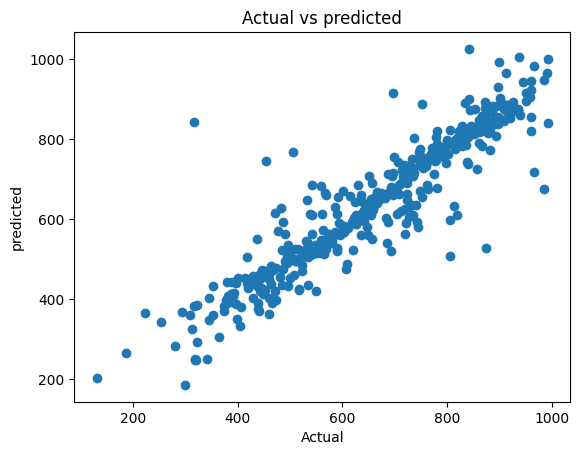

In [87]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [88]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 2ms/step


,Actual,predict,differences
431,529,508.016510,20.983490
610,624,604.485718,19.514282
795,635,613.514465,21.485535
1238,929,879.179260,49.820740
1228,890,842.056274,47.943726
794,656,626.502258,29.497742
642,645,617.086609,27.913391
416,443,461.563995,-18.563995
1410,898,930.720642,-32.720642
517,494,504.062164,-10.062164


##  keras tuner with RNN

In [89]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [90]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [91]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [92]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [93]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 21s 209ms/step - loss: 237.4624 - mean_absolute_error: 237.4624 - val_loss: 205.1525 - val_mean_absolute_error: 205.1525
Epoch 2/2000
22/22 [==============================] - 1s 57ms/step - loss: 103.1580 - mean_absolute_error: 103.1580 - val_loss: 77.2495 - val_mean_absolute_error: 77.2495
Epoch 3/2000
22/22 [==============================] - 1s 47ms/step - loss: 73.3521 - mean_absolute_error: 73.3521 - val_loss: 72.4088 - val_mean_absolute_error: 72.4088
Epoch 4/2000
22/22 [==============================] - 1s 50ms/step - loss: 62.8836 - mean_absolute_error: 62.8836 - val_loss: 63.1206 - val_mean_absolute_error: 63.1206
Epoch 5/2000
22/22 [==============================] - 1s 48ms/step - loss: 63.8867 - mean_absolute_error: 63.8867 - val_loss: 63.8169 - val_mean_absolute_error: 63.8169
Epoch 6/2000
22/22 [==============================] - 1s 50ms/step - loss: 70.8412 - mean_absolute_error: 70.8412 - val_loss: 70.6383 - val_mean_ab

22/22 [==============================] - 1s 41ms/step - loss: 55.4397 - mean_absolute_error: 55.4397 - val_loss: 61.3806 - val_mean_absolute_error: 61.3806
Epoch 98/2000
22/22 [==============================] - 1s 43ms/step - loss: 53.4267 - mean_absolute_error: 53.4267 - val_loss: 58.9372 - val_mean_absolute_error: 58.9372
Epoch 99/2000
22/22 [==============================] - 1s 37ms/step - loss: 56.1552 - mean_absolute_error: 56.1552 - val_loss: 56.8096 - val_mean_absolute_error: 56.8096
Epoch 100/2000
22/22 [==============================] - 1s 35ms/step - loss: 56.7232 - mean_absolute_error: 56.7232 - val_loss: 60.5078 - val_mean_absolute_error: 60.5078
Epoch 101/2000
22/22 [==============================] - 1s 40ms/step - loss: 54.3043 - mean_absolute_error: 54.3043 - val_loss: 59.7106 - val_mean_absolute_error: 59.7106
Epoch 102/2000
22/22 [==============================] - 1s 39ms/step - loss: 54.3560 - mean_absolute_error: 54.3560 - val_loss: 60.1270 - val_mean_absolute_error:

22/22 [==============================] - 1s 37ms/step - loss: 46.2569 - mean_absolute_error: 46.2569 - val_loss: 49.7091 - val_mean_absolute_error: 49.7091
Epoch 146/2000
22/22 [==============================] - 1s 45ms/step - loss: 47.8857 - mean_absolute_error: 47.8857 - val_loss: 61.0213 - val_mean_absolute_error: 61.0213
Epoch 147/2000
22/22 [==============================] - 1s 39ms/step - loss: 49.4651 - mean_absolute_error: 49.4651 - val_loss: 49.7563 - val_mean_absolute_error: 49.7563
Epoch 148/2000
22/22 [==============================] - 1s 36ms/step - loss: 43.9501 - mean_absolute_error: 43.9501 - val_loss: 45.9607 - val_mean_absolute_error: 45.9607
Epoch 149/2000
22/22 [==============================] - 1s 39ms/step - loss: 45.9804 - mean_absolute_error: 45.9804 - val_loss: 47.2308 - val_mean_absolute_error: 47.2308
Epoch 150/2000
22/22 [==============================] - 1s 41ms/step - loss: 44.2356 - mean_absolute_error: 44.2356 - val_loss: 49.5299 - val_mean_absolute_erro

Epoch 193/2000
22/22 [==============================] - 1s 38ms/step - loss: 35.2830 - mean_absolute_error: 35.2830 - val_loss: 41.2001 - val_mean_absolute_error: 41.2001
Epoch 194/2000
22/22 [==============================] - 1s 42ms/step - loss: 39.3591 - mean_absolute_error: 39.3591 - val_loss: 42.2263 - val_mean_absolute_error: 42.2263
Epoch 195/2000
22/22 [==============================] - 1s 42ms/step - loss: 35.8633 - mean_absolute_error: 35.8633 - val_loss: 43.4646 - val_mean_absolute_error: 43.4646
Epoch 196/2000
22/22 [==============================] - 1s 37ms/step - loss: 39.0550 - mean_absolute_error: 39.0550 - val_loss: 43.7249 - val_mean_absolute_error: 43.7249
Epoch 197/2000
22/22 [==============================] - 1s 41ms/step - loss: 37.9455 - mean_absolute_error: 37.9455 - val_loss: 42.2682 - val_mean_absolute_error: 42.2682
Epoch 198/2000
22/22 [==============================] - 1s 41ms/step - loss: 36.3704 - mean_absolute_error: 36.3704 - val_loss: 42.3872 - val_mea

Epoch 241/2000
22/22 [==============================] - 1s 38ms/step - loss: 36.0932 - mean_absolute_error: 36.0932 - val_loss: 41.6056 - val_mean_absolute_error: 41.6056
Epoch 242/2000
22/22 [==============================] - 1s 37ms/step - loss: 35.5351 - mean_absolute_error: 35.5351 - val_loss: 42.1587 - val_mean_absolute_error: 42.1587
Epoch 243/2000
22/22 [==============================] - 1s 38ms/step - loss: 37.6850 - mean_absolute_error: 37.6850 - val_loss: 49.8419 - val_mean_absolute_error: 49.8419
Epoch 244/2000
22/22 [==============================] - 1s 43ms/step - loss: 36.3711 - mean_absolute_error: 36.3711 - val_loss: 40.1411 - val_mean_absolute_error: 40.1411
Epoch 245/2000
22/22 [==============================] - 1s 37ms/step - loss: 34.6600 - mean_absolute_error: 34.6600 - val_loss: 40.7896 - val_mean_absolute_error: 40.7896
Epoch 246/2000
22/22 [==============================] - 1s 37ms/step - loss: 34.0496 - mean_absolute_error: 34.0496 - val_loss: 41.1478 - val_mea

Epoch 289/2000
22/22 [==============================] - 1s 39ms/step - loss: 33.1657 - mean_absolute_error: 33.1657 - val_loss: 41.0665 - val_mean_absolute_error: 41.0665
Epoch 290/2000
22/22 [==============================] - 1s 47ms/step - loss: 34.9523 - mean_absolute_error: 34.9523 - val_loss: 42.1678 - val_mean_absolute_error: 42.1678
Epoch 291/2000
22/22 [==============================] - 1s 40ms/step - loss: 36.1528 - mean_absolute_error: 36.1528 - val_loss: 38.9951 - val_mean_absolute_error: 38.9951
Epoch 292/2000
22/22 [==============================] - 1s 37ms/step - loss: 35.9153 - mean_absolute_error: 35.9153 - val_loss: 43.9169 - val_mean_absolute_error: 43.9169
Epoch 293/2000
22/22 [==============================] - 1s 41ms/step - loss: 34.9443 - mean_absolute_error: 34.9443 - val_loss: 40.6787 - val_mean_absolute_error: 40.6787
Epoch 294/2000
22/22 [==============================] - 1s 43ms/step - loss: 33.2175 - mean_absolute_error: 33.2175 - val_loss: 39.2450 - val_mea

Epoch 337/2000
22/22 [==============================] - 1s 40ms/step - loss: 35.0671 - mean_absolute_error: 35.0671 - val_loss: 42.9029 - val_mean_absolute_error: 42.9029
Epoch 338/2000
22/22 [==============================] - 1s 45ms/step - loss: 36.6292 - mean_absolute_error: 36.6292 - val_loss: 44.1126 - val_mean_absolute_error: 44.1126
Epoch 339/2000
22/22 [==============================] - 1s 41ms/step - loss: 37.1530 - mean_absolute_error: 37.1530 - val_loss: 40.8834 - val_mean_absolute_error: 40.8834
Epoch 340/2000
22/22 [==============================] - 1s 45ms/step - loss: 33.0395 - mean_absolute_error: 33.0395 - val_loss: 46.1675 - val_mean_absolute_error: 46.1675
Epoch 341/2000
22/22 [==============================] - 1s 42ms/step - loss: 34.5789 - mean_absolute_error: 34.5789 - val_loss: 44.0563 - val_mean_absolute_error: 44.0563
Epoch 342/2000
22/22 [==============================] - 1s 46ms/step - loss: 34.8823 - mean_absolute_error: 34.8823 - val_loss: 40.8850 - val_mea

Epoch 385/2000
22/22 [==============================] - 1s 38ms/step - loss: 35.5834 - mean_absolute_error: 35.5834 - val_loss: 43.8160 - val_mean_absolute_error: 43.8160
Epoch 386/2000
22/22 [==============================] - 1s 36ms/step - loss: 33.9648 - mean_absolute_error: 33.9648 - val_loss: 38.0093 - val_mean_absolute_error: 38.0093
Epoch 387/2000
22/22 [==============================] - 1s 41ms/step - loss: 31.4512 - mean_absolute_error: 31.4512 - val_loss: 41.8278 - val_mean_absolute_error: 41.8278
Epoch 388/2000
22/22 [==============================] - 1s 37ms/step - loss: 33.0082 - mean_absolute_error: 33.0082 - val_loss: 37.8658 - val_mean_absolute_error: 37.8658
Epoch 389/2000
22/22 [==============================] - 1s 38ms/step - loss: 32.9056 - mean_absolute_error: 32.9056 - val_loss: 39.3834 - val_mean_absolute_error: 39.3834
Epoch 390/2000
22/22 [==============================] - 1s 46ms/step - loss: 33.3560 - mean_absolute_error: 33.3560 - val_loss: 38.6831 - val_mea

Epoch 433/2000
22/22 [==============================] - 1s 49ms/step - loss: 35.1125 - mean_absolute_error: 35.1125 - val_loss: 39.2270 - val_mean_absolute_error: 39.2270
Epoch 434/2000
22/22 [==============================] - 1s 43ms/step - loss: 33.5778 - mean_absolute_error: 33.5778 - val_loss: 39.1401 - val_mean_absolute_error: 39.1401
Epoch 435/2000
22/22 [==============================] - 1s 49ms/step - loss: 34.1676 - mean_absolute_error: 34.1676 - val_loss: 39.1279 - val_mean_absolute_error: 39.1279
Epoch 436/2000
22/22 [==============================] - 1s 51ms/step - loss: 35.7452 - mean_absolute_error: 35.7452 - val_loss: 156.7090 - val_mean_absolute_error: 156.7090
Epoch 437/2000
22/22 [==============================] - 1s 54ms/step - loss: 39.0087 - mean_absolute_error: 39.0087 - val_loss: 38.3999 - val_mean_absolute_error: 38.3999
Epoch 438/2000
22/22 [==============================] - 1s 48ms/step - loss: 35.4525 - mean_absolute_error: 35.4525 - val_loss: 39.0566 - val_m

Epoch 481/2000
22/22 [==============================] - 1s 43ms/step - loss: 30.3105 - mean_absolute_error: 30.3105 - val_loss: 39.4219 - val_mean_absolute_error: 39.4219
Epoch 482/2000
22/22 [==============================] - 1s 47ms/step - loss: 31.7589 - mean_absolute_error: 31.7589 - val_loss: 52.0092 - val_mean_absolute_error: 52.0092
Epoch 483/2000
22/22 [==============================] - 1s 48ms/step - loss: 35.4104 - mean_absolute_error: 35.4104 - val_loss: 40.0866 - val_mean_absolute_error: 40.0866
Epoch 484/2000
22/22 [==============================] - 1s 52ms/step - loss: 33.0579 - mean_absolute_error: 33.0579 - val_loss: 39.0489 - val_mean_absolute_error: 39.0489
Epoch 485/2000
22/22 [==============================] - 1s 46ms/step - loss: 32.0208 - mean_absolute_error: 32.0208 - val_loss: 37.6151 - val_mean_absolute_error: 37.6151
Epoch 486/2000
22/22 [==============================] - 1s 46ms/step - loss: 31.0173 - mean_absolute_error: 31.0173 - val_loss: 40.2591 - val_mea

Epoch 529/2000
22/22 [==============================] - 1s 45ms/step - loss: 30.5381 - mean_absolute_error: 30.5381 - val_loss: 37.7640 - val_mean_absolute_error: 37.7640
Epoch 530/2000
22/22 [==============================] - 1s 44ms/step - loss: 30.5968 - mean_absolute_error: 30.5968 - val_loss: 36.8875 - val_mean_absolute_error: 36.8875
Epoch 531/2000
22/22 [==============================] - 1s 45ms/step - loss: 29.3231 - mean_absolute_error: 29.3231 - val_loss: 36.6871 - val_mean_absolute_error: 36.6871
Epoch 532/2000
22/22 [==============================] - 1s 46ms/step - loss: 29.2981 - mean_absolute_error: 29.2981 - val_loss: 39.3579 - val_mean_absolute_error: 39.3579
Epoch 533/2000
22/22 [==============================] - 1s 47ms/step - loss: 32.0767 - mean_absolute_error: 32.0767 - val_loss: 39.9444 - val_mean_absolute_error: 39.9444
Epoch 534/2000
22/22 [==============================] - 1s 46ms/step - loss: 30.0176 - mean_absolute_error: 30.0176 - val_loss: 37.7002 - val_mea

Epoch 577/2000
22/22 [==============================] - 1s 43ms/step - loss: 29.3886 - mean_absolute_error: 29.3886 - val_loss: 41.8876 - val_mean_absolute_error: 41.8876
Epoch 578/2000
22/22 [==============================] - 1s 46ms/step - loss: 32.8115 - mean_absolute_error: 32.8115 - val_loss: 38.1013 - val_mean_absolute_error: 38.1013
Epoch 579/2000
22/22 [==============================] - 1s 46ms/step - loss: 31.0537 - mean_absolute_error: 31.0537 - val_loss: 41.5061 - val_mean_absolute_error: 41.5061
Epoch 580/2000
22/22 [==============================] - 1s 50ms/step - loss: 33.7280 - mean_absolute_error: 33.7280 - val_loss: 39.2298 - val_mean_absolute_error: 39.2298
Epoch 581/2000
22/22 [==============================] - 1s 48ms/step - loss: 31.2672 - mean_absolute_error: 31.2672 - val_loss: 41.4555 - val_mean_absolute_error: 41.4555
Epoch 582/2000
22/22 [==============================] - 1s 46ms/step - loss: 31.9504 - mean_absolute_error: 31.9504 - val_loss: 39.9945 - val_mea

Epoch 625/2000
22/22 [==============================] - 1s 49ms/step - loss: 31.7543 - mean_absolute_error: 31.7543 - val_loss: 39.8668 - val_mean_absolute_error: 39.8668
Epoch 626/2000
22/22 [==============================] - 1s 42ms/step - loss: 30.6429 - mean_absolute_error: 30.6429 - val_loss: 38.1792 - val_mean_absolute_error: 38.1792
Epoch 627/2000
22/22 [==============================] - 1s 49ms/step - loss: 30.5041 - mean_absolute_error: 30.5041 - val_loss: 37.8102 - val_mean_absolute_error: 37.8102
Epoch 628/2000
22/22 [==============================] - 1s 43ms/step - loss: 28.8794 - mean_absolute_error: 28.8794 - val_loss: 37.6617 - val_mean_absolute_error: 37.6617
Epoch 629/2000
22/22 [==============================] - 1s 43ms/step - loss: 30.9149 - mean_absolute_error: 30.9149 - val_loss: 46.3049 - val_mean_absolute_error: 46.3049
Epoch 630/2000
22/22 [==============================] - 1s 51ms/step - loss: 30.3210 - mean_absolute_error: 30.3210 - val_loss: 38.9998 - val_mea

Epoch 673/2000
22/22 [==============================] - 1s 39ms/step - loss: 29.7489 - mean_absolute_error: 29.7489 - val_loss: 38.7255 - val_mean_absolute_error: 38.7255
Epoch 674/2000
22/22 [==============================] - 1s 46ms/step - loss: 28.9364 - mean_absolute_error: 28.9364 - val_loss: 39.0592 - val_mean_absolute_error: 39.0592
Epoch 675/2000
22/22 [==============================] - 1s 44ms/step - loss: 32.2159 - mean_absolute_error: 32.2159 - val_loss: 39.9965 - val_mean_absolute_error: 39.9965
Epoch 676/2000
22/22 [==============================] - 1s 48ms/step - loss: 30.8523 - mean_absolute_error: 30.8523 - val_loss: 38.4177 - val_mean_absolute_error: 38.4177
Epoch 677/2000
22/22 [==============================] - 1s 42ms/step - loss: 29.8703 - mean_absolute_error: 29.8703 - val_loss: 38.6033 - val_mean_absolute_error: 38.6033
Epoch 678/2000
22/22 [==============================] - 1s 45ms/step - loss: 28.2751 - mean_absolute_error: 28.2751 - val_loss: 37.8447 - val_mea

Epoch 721/2000
22/22 [==============================] - 1s 46ms/step - loss: 29.3626 - mean_absolute_error: 29.3626 - val_loss: 39.0754 - val_mean_absolute_error: 39.0754
Epoch 722/2000
22/22 [==============================] - 1s 44ms/step - loss: 30.2397 - mean_absolute_error: 30.2397 - val_loss: 44.3735 - val_mean_absolute_error: 44.3735
Epoch 723/2000
22/22 [==============================] - 1s 53ms/step - loss: 30.3152 - mean_absolute_error: 30.3152 - val_loss: 38.1471 - val_mean_absolute_error: 38.1471
Epoch 724/2000
22/22 [==============================] - 1s 50ms/step - loss: 30.9089 - mean_absolute_error: 30.9089 - val_loss: 40.7123 - val_mean_absolute_error: 40.7123
Epoch 725/2000
22/22 [==============================] - 1s 60ms/step - loss: 28.7506 - mean_absolute_error: 28.7506 - val_loss: 37.1463 - val_mean_absolute_error: 37.1463
Epoch 726/2000
22/22 [==============================] - 1s 49ms/step - loss: 29.1539 - mean_absolute_error: 29.1539 - val_loss: 40.2631 - val_mea

Epoch 769/2000
22/22 [==============================] - 1s 42ms/step - loss: 29.1697 - mean_absolute_error: 29.1697 - val_loss: 39.0592 - val_mean_absolute_error: 39.0592
Epoch 770/2000
22/22 [==============================] - 1s 50ms/step - loss: 31.9804 - mean_absolute_error: 31.9804 - val_loss: 40.0296 - val_mean_absolute_error: 40.0296
Epoch 771/2000
22/22 [==============================] - 1s 44ms/step - loss: 27.9198 - mean_absolute_error: 27.9198 - val_loss: 38.1360 - val_mean_absolute_error: 38.1360
Epoch 772/2000
22/22 [==============================] - 1s 46ms/step - loss: 28.0428 - mean_absolute_error: 28.0428 - val_loss: 38.5679 - val_mean_absolute_error: 38.5679
Epoch 773/2000
22/22 [==============================] - 1s 45ms/step - loss: 28.0182 - mean_absolute_error: 28.0182 - val_loss: 37.8485 - val_mean_absolute_error: 37.8485
Epoch 774/2000
22/22 [==============================] - 1s 44ms/step - loss: 27.4346 - mean_absolute_error: 27.4346 - val_loss: 41.4886 - val_mea

Epoch 817/2000
22/22 [==============================] - 1s 45ms/step - loss: 28.6836 - mean_absolute_error: 28.6836 - val_loss: 38.1272 - val_mean_absolute_error: 38.1272
Epoch 818/2000
22/22 [==============================] - 1s 49ms/step - loss: 28.3848 - mean_absolute_error: 28.3848 - val_loss: 36.5588 - val_mean_absolute_error: 36.5588
Epoch 819/2000
22/22 [==============================] - 1s 46ms/step - loss: 29.0462 - mean_absolute_error: 29.0462 - val_loss: 37.6309 - val_mean_absolute_error: 37.6309
Epoch 820/2000
22/22 [==============================] - 1s 45ms/step - loss: 29.0810 - mean_absolute_error: 29.0810 - val_loss: 38.7126 - val_mean_absolute_error: 38.7126
Epoch 821/2000
22/22 [==============================] - 1s 46ms/step - loss: 28.7039 - mean_absolute_error: 28.7039 - val_loss: 41.6966 - val_mean_absolute_error: 41.6966
Epoch 822/2000
22/22 [==============================] - 1s 46ms/step - loss: 29.4092 - mean_absolute_error: 29.4092 - val_loss: 40.2444 - val_mea

Epoch 865/2000
22/22 [==============================] - 1s 47ms/step - loss: 27.9969 - mean_absolute_error: 27.9969 - val_loss: 39.8391 - val_mean_absolute_error: 39.8391
Epoch 866/2000
22/22 [==============================] - 1s 48ms/step - loss: 27.9794 - mean_absolute_error: 27.9794 - val_loss: 37.7309 - val_mean_absolute_error: 37.7309
Epoch 867/2000
22/22 [==============================] - 1s 48ms/step - loss: 28.6157 - mean_absolute_error: 28.6157 - val_loss: 37.6200 - val_mean_absolute_error: 37.6200
Epoch 868/2000
22/22 [==============================] - 1s 48ms/step - loss: 28.2566 - mean_absolute_error: 28.2566 - val_loss: 37.1073 - val_mean_absolute_error: 37.1073
Epoch 869/2000
22/22 [==============================] - 1s 44ms/step - loss: 27.4261 - mean_absolute_error: 27.4261 - val_loss: 39.5672 - val_mean_absolute_error: 39.5672
Epoch 870/2000
22/22 [==============================] - 1s 44ms/step - loss: 29.5781 - mean_absolute_error: 29.5781 - val_loss: 38.7998 - val_mea

Epoch 913/2000
22/22 [==============================] - 1s 49ms/step - loss: 29.2979 - mean_absolute_error: 29.2979 - val_loss: 38.7558 - val_mean_absolute_error: 38.7558
Epoch 914/2000
22/22 [==============================] - 1s 45ms/step - loss: 30.8915 - mean_absolute_error: 30.8915 - val_loss: 39.4135 - val_mean_absolute_error: 39.4135
Epoch 915/2000
22/22 [==============================] - 1s 51ms/step - loss: 29.2684 - mean_absolute_error: 29.2684 - val_loss: 38.1740 - val_mean_absolute_error: 38.1740
Epoch 916/2000
22/22 [==============================] - 1s 45ms/step - loss: 28.1679 - mean_absolute_error: 28.1679 - val_loss: 38.2430 - val_mean_absolute_error: 38.2430
Epoch 917/2000
22/22 [==============================] - 1s 50ms/step - loss: 26.6555 - mean_absolute_error: 26.6555 - val_loss: 38.9424 - val_mean_absolute_error: 38.9424
Epoch 918/2000
22/22 [==============================] - 1s 52ms/step - loss: 28.1656 - mean_absolute_error: 28.1656 - val_loss: 40.6752 - val_mea

Epoch 961/2000
22/22 [==============================] - 1s 43ms/step - loss: 28.6021 - mean_absolute_error: 28.6021 - val_loss: 38.8465 - val_mean_absolute_error: 38.8465
Epoch 962/2000
22/22 [==============================] - 1s 52ms/step - loss: 26.9430 - mean_absolute_error: 26.9430 - val_loss: 38.6753 - val_mean_absolute_error: 38.6753
Epoch 963/2000
22/22 [==============================] - 1s 46ms/step - loss: 28.8175 - mean_absolute_error: 28.8175 - val_loss: 38.0168 - val_mean_absolute_error: 38.0168
Epoch 964/2000
22/22 [==============================] - 1s 49ms/step - loss: 30.0110 - mean_absolute_error: 30.0110 - val_loss: 36.3620 - val_mean_absolute_error: 36.3620
Epoch 965/2000
22/22 [==============================] - 1s 49ms/step - loss: 28.2488 - mean_absolute_error: 28.2488 - val_loss: 36.6710 - val_mean_absolute_error: 36.6710
Epoch 966/2000
22/22 [==============================] - 1s 47ms/step - loss: 26.2002 - mean_absolute_error: 26.2002 - val_loss: 38.0117 - val_mea

Epoch 1009/2000
22/22 [==============================] - 1s 52ms/step - loss: 27.1090 - mean_absolute_error: 27.1090 - val_loss: 36.6241 - val_mean_absolute_error: 36.6241
Epoch 1010/2000
22/22 [==============================] - 1s 59ms/step - loss: 27.0008 - mean_absolute_error: 27.0008 - val_loss: 36.3641 - val_mean_absolute_error: 36.3641
Epoch 1011/2000
22/22 [==============================] - 1s 55ms/step - loss: 26.0094 - mean_absolute_error: 26.0094 - val_loss: 36.0127 - val_mean_absolute_error: 36.0127
Epoch 1012/2000
22/22 [==============================] - 1s 52ms/step - loss: 26.3033 - mean_absolute_error: 26.3033 - val_loss: 39.3250 - val_mean_absolute_error: 39.3250
Epoch 1013/2000
22/22 [==============================] - 1s 50ms/step - loss: 27.7649 - mean_absolute_error: 27.7649 - val_loss: 38.9075 - val_mean_absolute_error: 38.9075
Epoch 1014/2000
22/22 [==============================] - 1s 56ms/step - loss: 29.5707 - mean_absolute_error: 29.5707 - val_loss: 37.4057 - v

Epoch 1104/2000
22/22 [==============================] - 1s 53ms/step - loss: 26.5900 - mean_absolute_error: 26.5900 - val_loss: 39.0076 - val_mean_absolute_error: 39.0076
Epoch 1105/2000
22/22 [==============================] - 1s 57ms/step - loss: 27.3554 - mean_absolute_error: 27.3554 - val_loss: 35.7235 - val_mean_absolute_error: 35.7235
Epoch 1106/2000
22/22 [==============================] - 1s 60ms/step - loss: 28.9569 - mean_absolute_error: 28.9569 - val_loss: 36.9295 - val_mean_absolute_error: 36.9295
Epoch 1107/2000
22/22 [==============================] - 1s 58ms/step - loss: 26.7667 - mean_absolute_error: 26.7667 - val_loss: 37.0406 - val_mean_absolute_error: 37.0406
Epoch 1108/2000
22/22 [==============================] - 1s 66ms/step - loss: 26.9253 - mean_absolute_error: 26.9253 - val_loss: 37.2586 - val_mean_absolute_error: 37.2586
Epoch 1109/2000
22/22 [==============================] - 1s 65ms/step - loss: 26.1920 - mean_absolute_error: 26.1920 - val_loss: 36.0763 - v

Epoch 1199/2000
22/22 [==============================] - 1s 60ms/step - loss: 25.6243 - mean_absolute_error: 25.6243 - val_loss: 37.2471 - val_mean_absolute_error: 37.2471
Epoch 1200/2000
22/22 [==============================] - 2s 70ms/step - loss: 28.0580 - mean_absolute_error: 28.0580 - val_loss: 41.0710 - val_mean_absolute_error: 41.0710
Epoch 1201/2000
22/22 [==============================] - 1s 61ms/step - loss: 27.4232 - mean_absolute_error: 27.4232 - val_loss: 36.8981 - val_mean_absolute_error: 36.8981
Epoch 1202/2000
22/22 [==============================] - 1s 63ms/step - loss: 26.1370 - mean_absolute_error: 26.1370 - val_loss: 35.8803 - val_mean_absolute_error: 35.8803
Epoch 1203/2000
22/22 [==============================] - 2s 69ms/step - loss: 26.5047 - mean_absolute_error: 26.5047 - val_loss: 36.3892 - val_mean_absolute_error: 36.3892
Epoch 1204/2000
22/22 [==============================] - 2s 60ms/step - loss: 27.9589 - mean_absolute_error: 27.9589 - val_loss: 37.1726 - v

Epoch 1294/2000
22/22 [==============================] - 1s 55ms/step - loss: 28.4599 - mean_absolute_error: 28.4599 - val_loss: 35.7129 - val_mean_absolute_error: 35.7129
Epoch 1295/2000
22/22 [==============================] - 1s 57ms/step - loss: 24.7069 - mean_absolute_error: 24.7069 - val_loss: 37.3531 - val_mean_absolute_error: 37.3531
Epoch 1296/2000
22/22 [==============================] - 1s 64ms/step - loss: 25.5197 - mean_absolute_error: 25.5197 - val_loss: 35.4515 - val_mean_absolute_error: 35.4515
Epoch 1297/2000
22/22 [==============================] - 2s 73ms/step - loss: 24.7994 - mean_absolute_error: 24.7994 - val_loss: 35.3021 - val_mean_absolute_error: 35.3021
Epoch 1298/2000
22/22 [==============================] - 1s 61ms/step - loss: 25.0882 - mean_absolute_error: 25.0882 - val_loss: 36.3497 - val_mean_absolute_error: 36.3497
Epoch 1299/2000
22/22 [==============================] - 1s 59ms/step - loss: 28.4360 - mean_absolute_error: 28.4360 - val_loss: 39.5010 - v

Epoch 1389/2000
22/22 [==============================] - 1s 63ms/step - loss: 27.4497 - mean_absolute_error: 27.4497 - val_loss: 38.4805 - val_mean_absolute_error: 38.4805
Epoch 1390/2000
22/22 [==============================] - 1s 66ms/step - loss: 26.0482 - mean_absolute_error: 26.0482 - val_loss: 37.8181 - val_mean_absolute_error: 37.8181
Epoch 1391/2000
22/22 [==============================] - 1s 63ms/step - loss: 26.4671 - mean_absolute_error: 26.4671 - val_loss: 36.6992 - val_mean_absolute_error: 36.6992
Epoch 1392/2000
22/22 [==============================] - 1s 60ms/step - loss: 26.4814 - mean_absolute_error: 26.4814 - val_loss: 35.9323 - val_mean_absolute_error: 35.9323
Epoch 1393/2000
22/22 [==============================] - 2s 78ms/step - loss: 26.6051 - mean_absolute_error: 26.6051 - val_loss: 37.7779 - val_mean_absolute_error: 37.7779
Epoch 1394/2000
22/22 [==============================] - 2s 72ms/step - loss: 25.9287 - mean_absolute_error: 25.9287 - val_loss: 37.3397 - v

Epoch 1484/2000
22/22 [==============================] - 1s 57ms/step - loss: 24.6247 - mean_absolute_error: 24.6247 - val_loss: 34.6586 - val_mean_absolute_error: 34.6586
Epoch 1485/2000
22/22 [==============================] - 2s 74ms/step - loss: 24.8455 - mean_absolute_error: 24.8455 - val_loss: 37.5718 - val_mean_absolute_error: 37.5718
Epoch 1486/2000
22/22 [==============================] - 2s 90ms/step - loss: 24.2992 - mean_absolute_error: 24.2992 - val_loss: 36.0117 - val_mean_absolute_error: 36.0117
Epoch 1487/2000
22/22 [==============================] - 2s 75ms/step - loss: 24.5208 - mean_absolute_error: 24.5208 - val_loss: 35.9141 - val_mean_absolute_error: 35.9141
Epoch 1488/2000
22/22 [==============================] - 2s 75ms/step - loss: 24.7918 - mean_absolute_error: 24.7918 - val_loss: 35.7066 - val_mean_absolute_error: 35.7066
Epoch 1489/2000
22/22 [==============================] - 2s 71ms/step - loss: 24.5249 - mean_absolute_error: 24.5249 - val_loss: 35.1858 - v

Epoch 1579/2000
22/22 [==============================] - 1s 57ms/step - loss: 24.9250 - mean_absolute_error: 24.9250 - val_loss: 37.2311 - val_mean_absolute_error: 37.2311
Epoch 1580/2000
22/22 [==============================] - 1s 60ms/step - loss: 24.2857 - mean_absolute_error: 24.2857 - val_loss: 36.9848 - val_mean_absolute_error: 36.9848
Epoch 1581/2000
22/22 [==============================] - 1s 67ms/step - loss: 24.8733 - mean_absolute_error: 24.8733 - val_loss: 36.1272 - val_mean_absolute_error: 36.1272
Epoch 1582/2000
22/22 [==============================] - 1s 62ms/step - loss: 25.7952 - mean_absolute_error: 25.7952 - val_loss: 36.4274 - val_mean_absolute_error: 36.4274
Epoch 1583/2000
22/22 [==============================] - 1s 54ms/step - loss: 26.8647 - mean_absolute_error: 26.8647 - val_loss: 36.3215 - val_mean_absolute_error: 36.3215
Epoch 1584/2000
22/22 [==============================] - 1s 60ms/step - loss: 24.9738 - mean_absolute_error: 24.9738 - val_loss: 36.6760 - v

Epoch 1674/2000
22/22 [==============================] - 2s 78ms/step - loss: 26.8046 - mean_absolute_error: 26.8046 - val_loss: 36.7288 - val_mean_absolute_error: 36.7288
Epoch 1675/2000
22/22 [==============================] - 1s 66ms/step - loss: 27.6411 - mean_absolute_error: 27.6411 - val_loss: 37.3517 - val_mean_absolute_error: 37.3517
Epoch 1676/2000
22/22 [==============================] - 1s 60ms/step - loss: 26.1410 - mean_absolute_error: 26.1410 - val_loss: 38.7329 - val_mean_absolute_error: 38.7329
Epoch 1677/2000
22/22 [==============================] - 1s 68ms/step - loss: 29.6762 - mean_absolute_error: 29.6762 - val_loss: 38.6237 - val_mean_absolute_error: 38.6237
Epoch 1678/2000
22/22 [==============================] - 2s 69ms/step - loss: 29.0869 - mean_absolute_error: 29.0869 - val_loss: 38.4645 - val_mean_absolute_error: 38.4645
Epoch 1679/2000
22/22 [==============================] - 1s 69ms/step - loss: 27.4206 - mean_absolute_error: 27.4206 - val_loss: 37.3318 - v

Epoch 1769/2000
22/22 [==============================] - 1s 57ms/step - loss: 24.8622 - mean_absolute_error: 24.8622 - val_loss: 35.7457 - val_mean_absolute_error: 35.7457
Epoch 1770/2000
22/22 [==============================] - 1s 59ms/step - loss: 23.8717 - mean_absolute_error: 23.8717 - val_loss: 36.8446 - val_mean_absolute_error: 36.8446
Epoch 1771/2000
22/22 [==============================] - 1s 67ms/step - loss: 24.0974 - mean_absolute_error: 24.0974 - val_loss: 36.2401 - val_mean_absolute_error: 36.2401
Epoch 1772/2000
22/22 [==============================] - 1s 61ms/step - loss: 24.3622 - mean_absolute_error: 24.3622 - val_loss: 35.8908 - val_mean_absolute_error: 35.8908
Epoch 1773/2000
22/22 [==============================] - 1s 57ms/step - loss: 24.2461 - mean_absolute_error: 24.2461 - val_loss: 34.9273 - val_mean_absolute_error: 34.9273
Epoch 1774/2000
22/22 [==============================] - 1s 64ms/step - loss: 24.9249 - mean_absolute_error: 24.9249 - val_loss: 35.8587 - v

Epoch 1864/2000
22/22 [==============================] - 1s 61ms/step - loss: 24.2238 - mean_absolute_error: 24.2238 - val_loss: 38.5585 - val_mean_absolute_error: 38.5585
Epoch 1865/2000
22/22 [==============================] - 1s 63ms/step - loss: 23.6417 - mean_absolute_error: 23.6417 - val_loss: 36.0842 - val_mean_absolute_error: 36.0842
Epoch 1866/2000
22/22 [==============================] - 1s 65ms/step - loss: 25.5818 - mean_absolute_error: 25.5818 - val_loss: 40.5031 - val_mean_absolute_error: 40.5031
Epoch 1867/2000
22/22 [==============================] - 2s 70ms/step - loss: 25.9529 - mean_absolute_error: 25.9529 - val_loss: 42.0346 - val_mean_absolute_error: 42.0346
Epoch 1868/2000
22/22 [==============================] - 1s 64ms/step - loss: 24.8955 - mean_absolute_error: 24.8955 - val_loss: 37.2010 - val_mean_absolute_error: 37.2010
Epoch 1869/2000
22/22 [==============================] - 2s 72ms/step - loss: 24.0298 - mean_absolute_error: 24.0298 - val_loss: 37.8965 - v

Epoch 1959/2000
22/22 [==============================] - 2s 72ms/step - loss: 25.3499 - mean_absolute_error: 25.3499 - val_loss: 35.2554 - val_mean_absolute_error: 35.2554
Epoch 1960/2000
22/22 [==============================] - 1s 65ms/step - loss: 22.9208 - mean_absolute_error: 22.9208 - val_loss: 35.9464 - val_mean_absolute_error: 35.9464
Epoch 1961/2000
22/22 [==============================] - 1s 64ms/step - loss: 23.0052 - mean_absolute_error: 23.0052 - val_loss: 35.5921 - val_mean_absolute_error: 35.5921
Epoch 1962/2000
22/22 [==============================] - 1s 59ms/step - loss: 24.5254 - mean_absolute_error: 24.5254 - val_loss: 40.3881 - val_mean_absolute_error: 40.3881
Epoch 1963/2000
22/22 [==============================] - 2s 79ms/step - loss: 25.7807 - mean_absolute_error: 25.7807 - val_loss: 35.2394 - val_mean_absolute_error: 35.2394
Epoch 1964/2000
22/22 [==============================] - 2s 76ms/step - loss: 25.2595 - mean_absolute_error: 25.2595 - val_loss: 36.4767 - v

In [94]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

14/14 [==============================] - 2s 21ms/step


0.8711292284109602

In [95]:
prediction =np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 2s 2s/step
Prediction: 417.1702575683594


In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 1s 10ms/step
mean squired error: 4283.602579338294
mean absolute error: 36.608119642230825


14/14 [==============================] - 1s 14ms/step


Text(0.5, 1.0, 'Actual vs predicted')

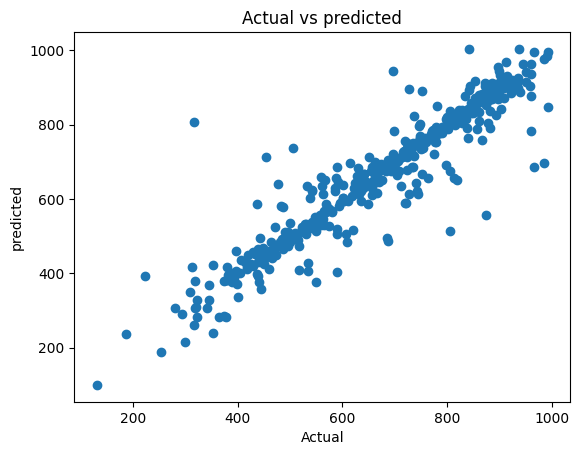

In [97]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [98]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 1s 14ms/step


,Actual,predict,differences
431,529,533.588074,-4.588074
610,624,623.677979,0.322021
795,635,641.804565,-6.804565
1238,929,903.280090,25.719910
1228,890,885.801758,4.198242
794,656,629.832947,26.167053
642,645,639.391541,5.608459
416,443,436.637817,6.362183
1410,898,954.516724,-56.516724
517,494,487.830109,6.169891
